## Useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *

SyntaxError: unexpected EOF while parsing (main.py, line 329)

## One run plots:

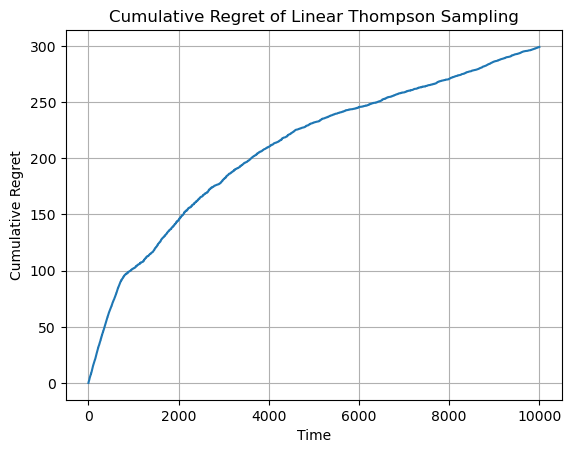

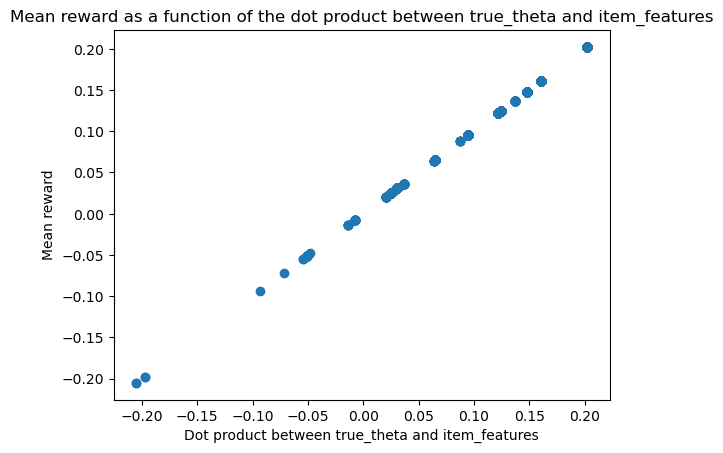

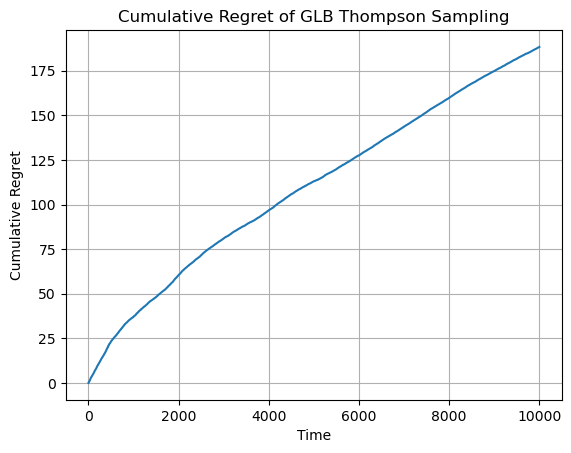

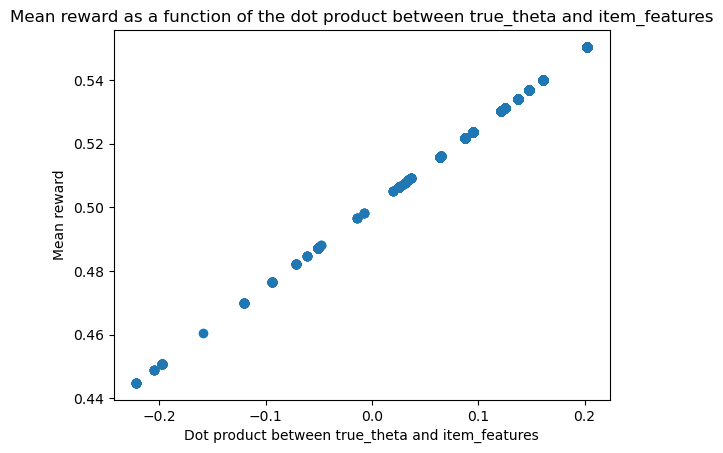

In [2]:
# Initialize the environment and the bandit.
d = 5
num_items = 30
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors, dot_products, mean_rewards = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'linear')
plot_regret(regrets, "Cumulative Regret of Linear Thompson Sampling")
plot_dot_products_and_mean_rewards(dot_products, mean_rewards)

num_rounds = 10000
regrets2, errors2, dot_products2, mean_rewards2 = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'logistic')
plot_regret(regrets2, "Cumulative Regret of GLB Thompson Sampling")
plot_dot_products_and_mean_rewards(dot_products2, mean_rewards2)

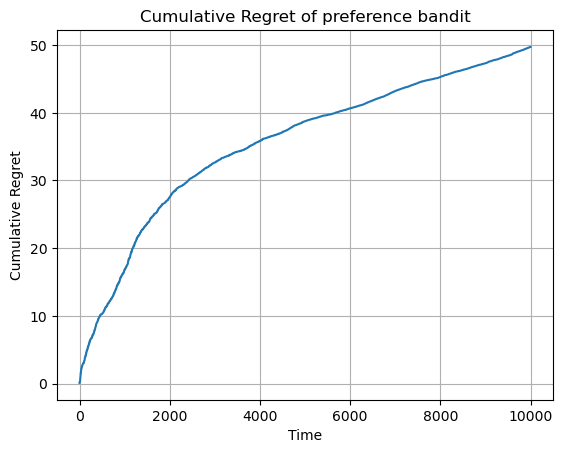

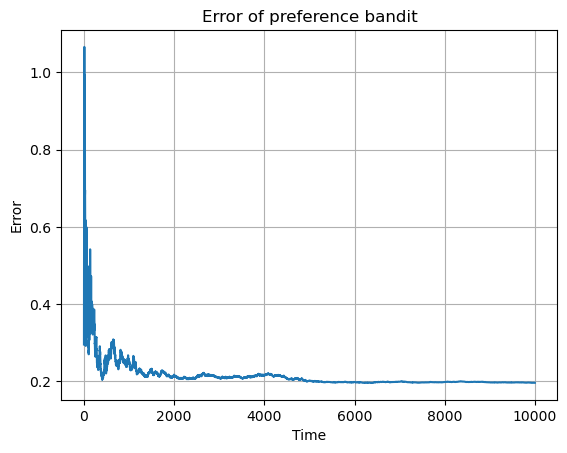

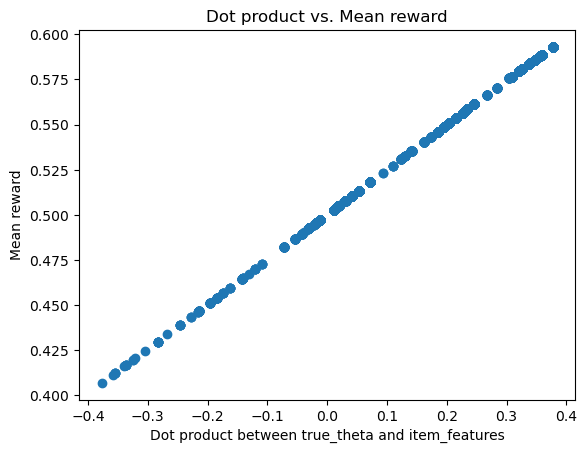

In [3]:
# Initialize the environment and the bandit.
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
item_features[:,-1] = 1 # Set the last feature to 1 for all items

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors, dot_products, mean_rewards = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'preference')
plot_regret(regrets, "Cumulative Regret of preference bandit")
plot_error(errors, "Error of preference bandit")

# Plot the dot_products as the X_axis and the mean_rewards as the Y_axis
plt.scatter(dot_products, mean_rewards)
plt.xlabel("Dot product between true_theta and item_features")
plt.ylabel("Mean reward")
plt.title("Dot product vs. Mean reward")
plt.show()

## Preference Bandit experiments over 10 runs

### Witness experiment

Runs progress:   0%|          | 0/10 [00:00<?, ?it/s]

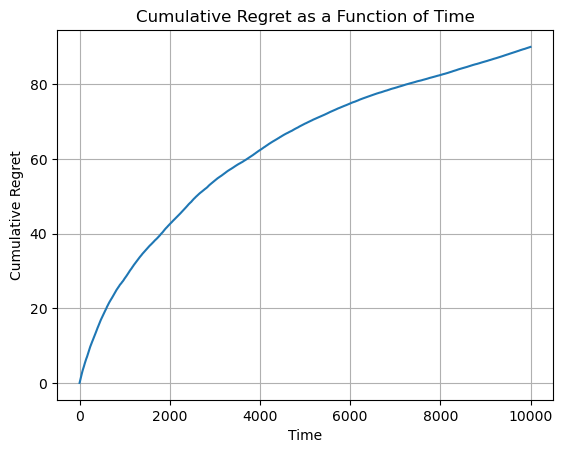

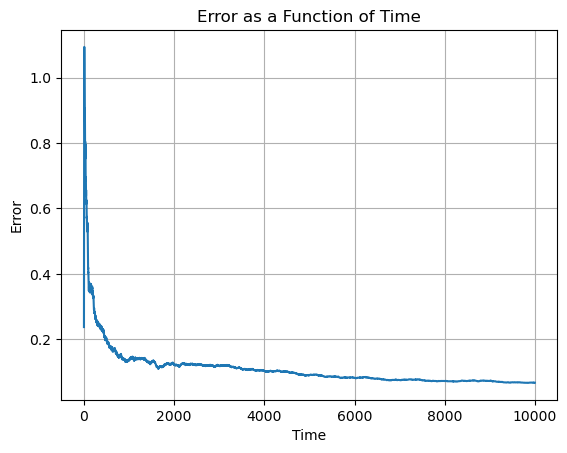

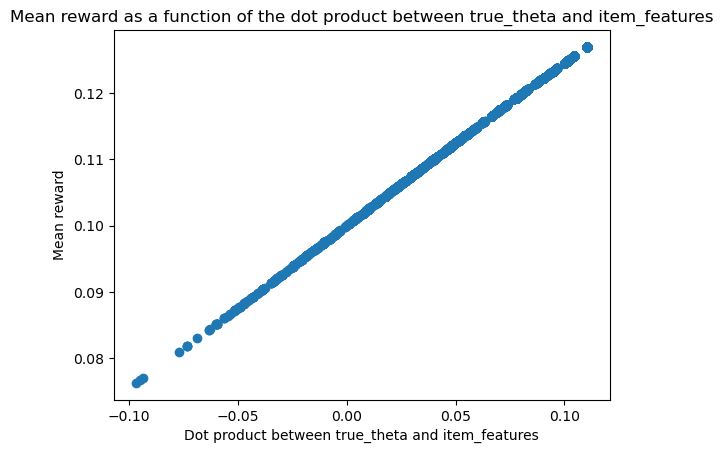

In [4]:
run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs=10, alpha=1, type = 'preference')

## Changing the last component of true_theta

Runs progress:   0%|          | 0/10 [00:00<?, ?it/s]

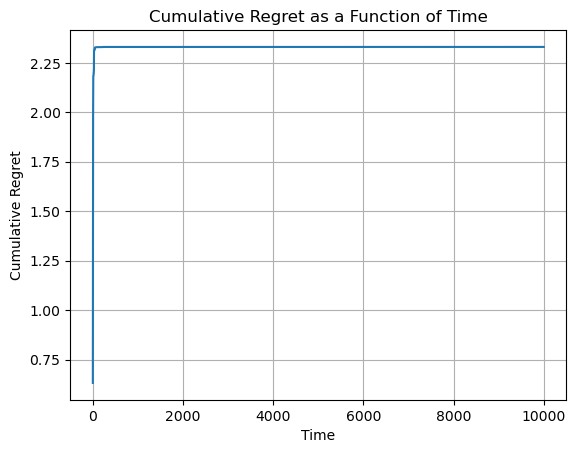

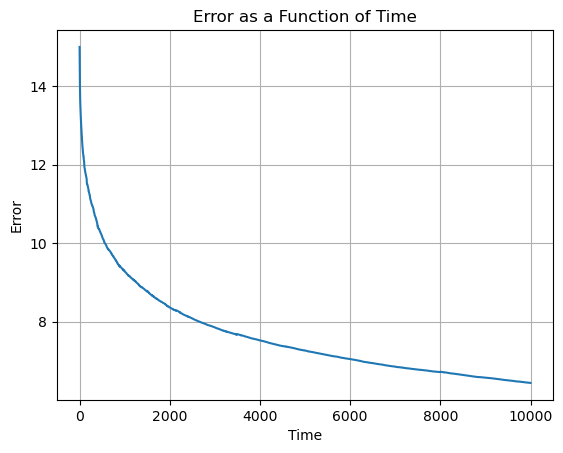

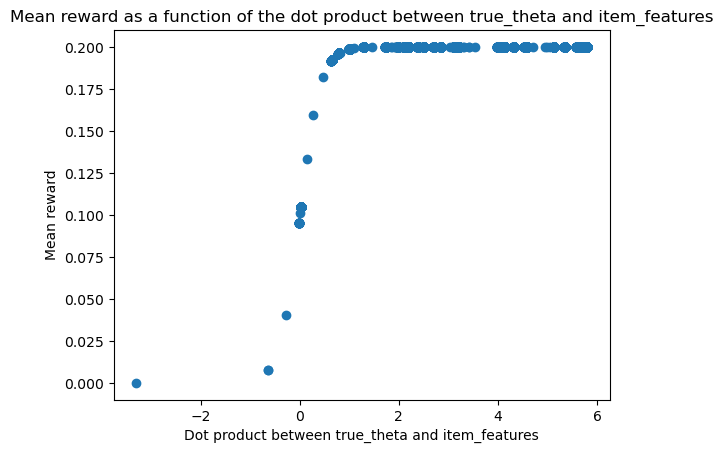

In [6]:
true_theta_v2 = true_theta
true_theta_v2[-1] = 15
run_and_plot_thompson_sampling(d, item_features, true_theta_v2, num_rounds, sigma_noise, nbr_runs=10, alpha=1, type = 'preference')

Runs progress:   0%|          | 0/10 [00:00<?, ?it/s]

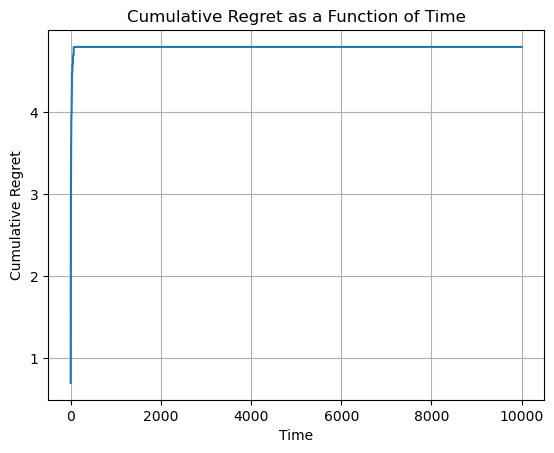

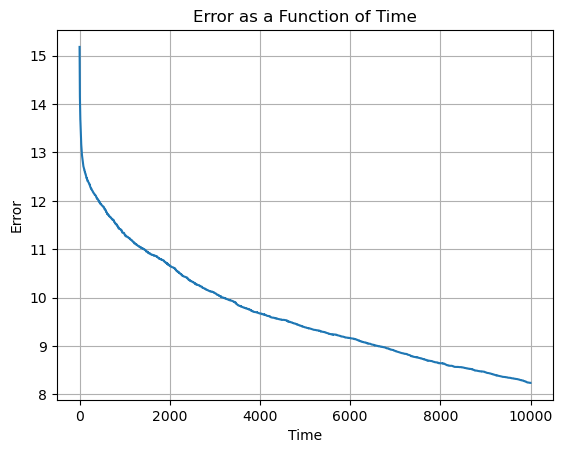

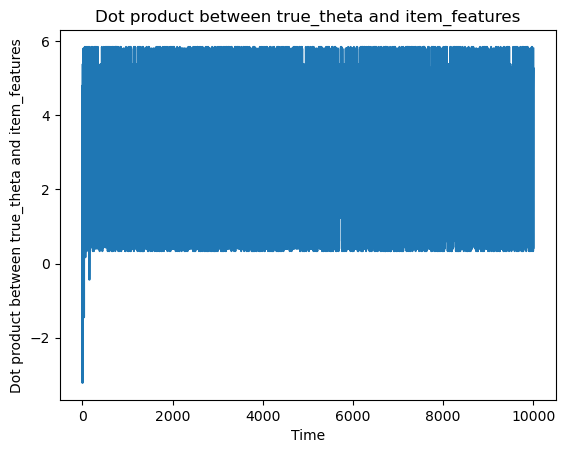

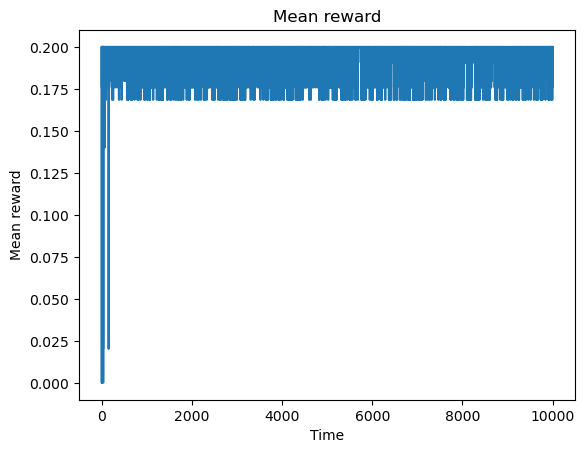

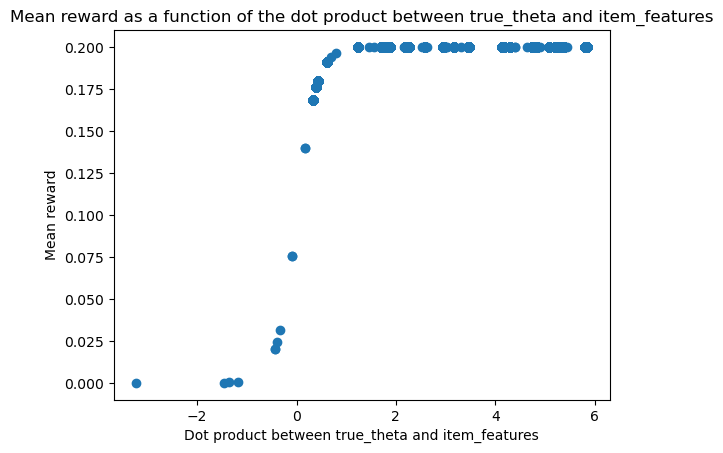

In [5]:
true_theta_v2 = true_theta
true_theta_v2[-1] = -15
run_and_plot_thompson_sampling(d, item_features, true_theta_v2, num_rounds, sigma_noise, nbr_runs=10, alpha=1, type = 'preference')

In [11]:
# Initialize the true_theta array that is true_theta with the last element set from [-20, -10, -5, 5, 10, 20]
d = 5
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [5, 10, 15]
true_theta_array = np.zeros((len(last_component_values), d))
for i in range(len(last_component_values)):
    true_theta = original_true_theta.copy() # Use copy to avoid modifying original_true_theta
    true_theta[-1] = last_component_values[i]
    true_theta_array[i] = true_theta


[[-1.37185208e-01  9.64530581e-05 -1.08166647e-01 -1.60655991e-01
   5.00000000e+00]
 [-1.37185208e-01  9.64530581e-05 -1.08166647e-01 -1.60655991e-01
   1.00000000e+01]
 [-1.37185208e-01  9.64530581e-05 -1.08166647e-01 -1.60655991e-01
   1.50000000e+01]]


Total progress:   0%|          | 0/6 [00:00<?, ?it/s]

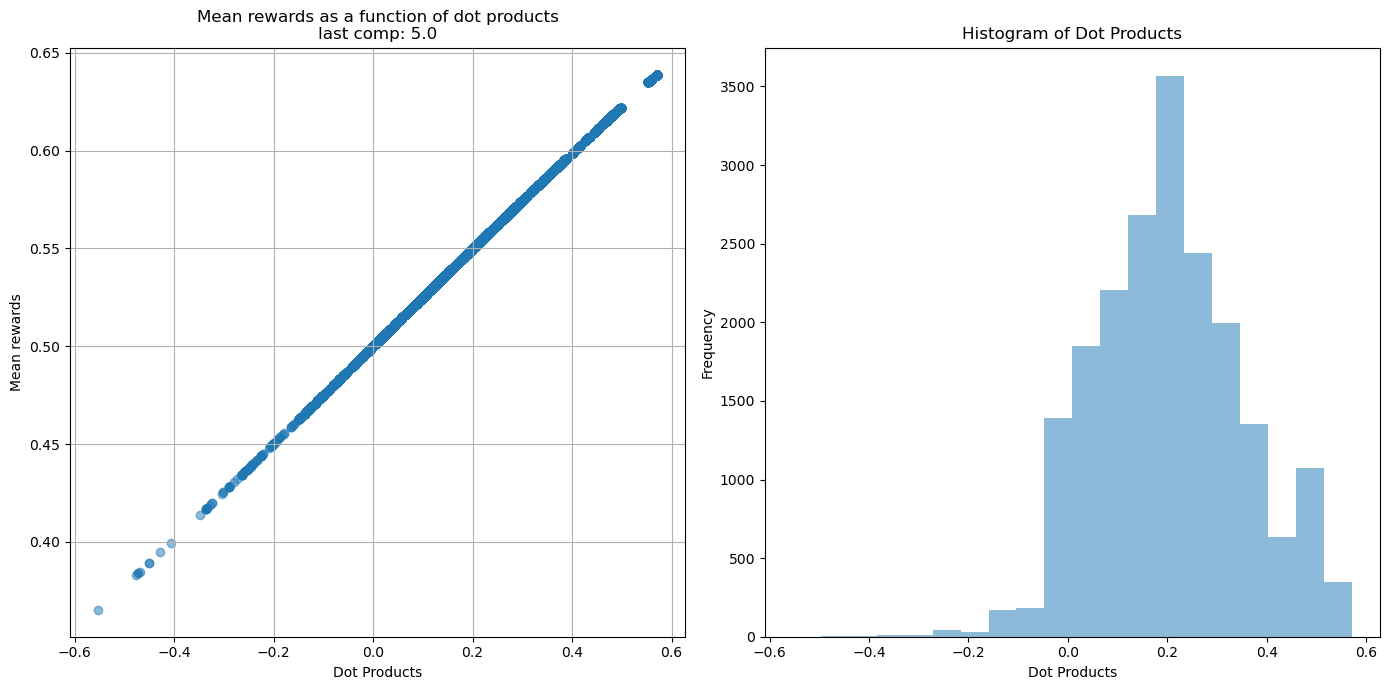

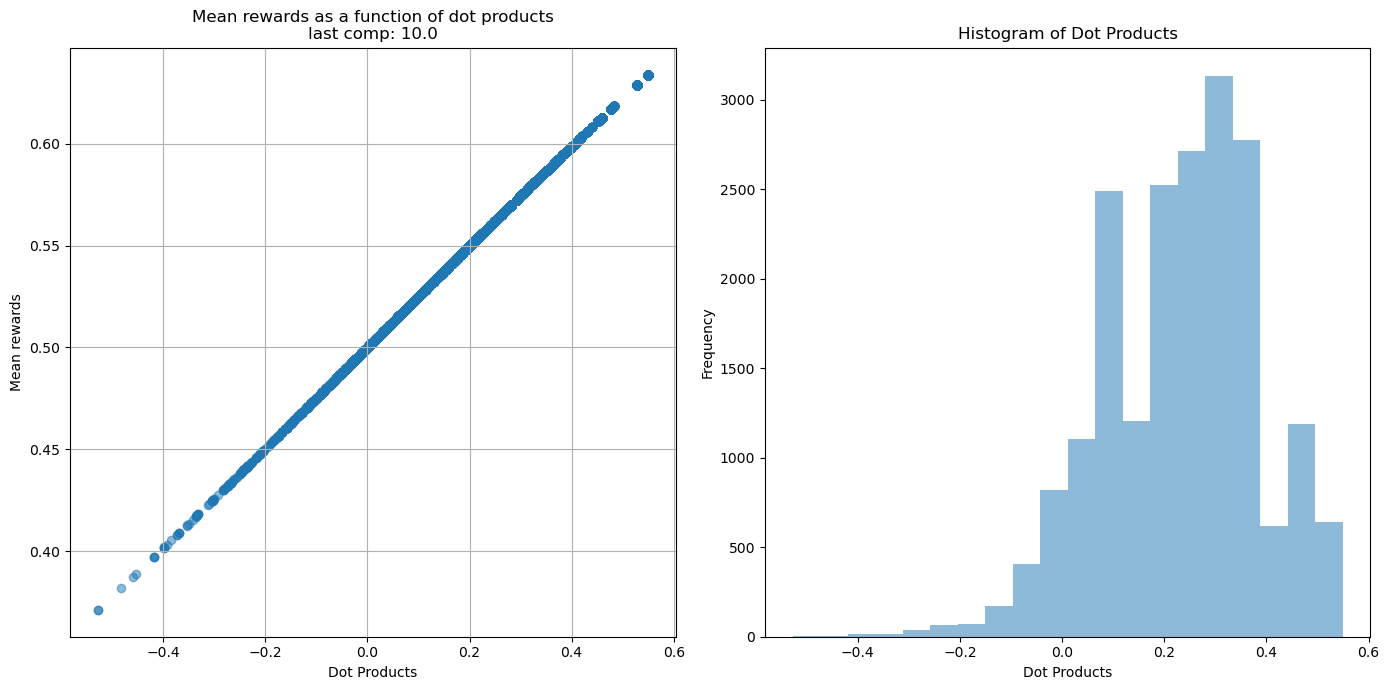

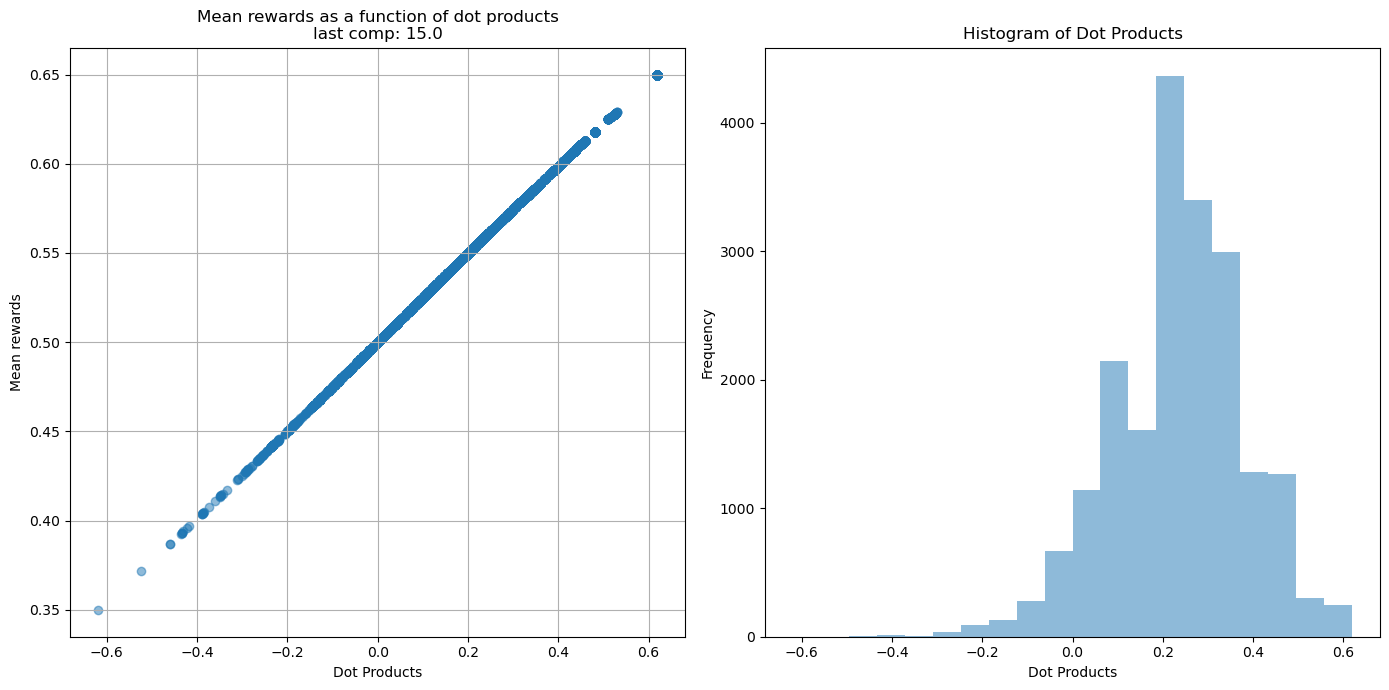

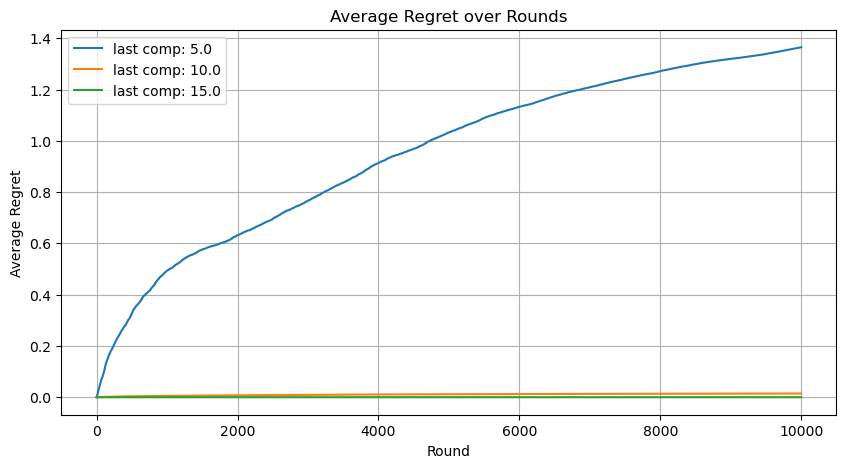

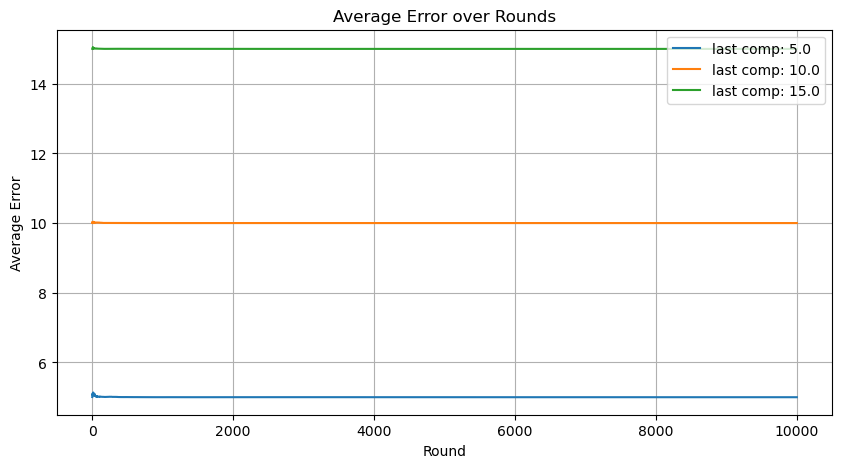

In [12]:
print(true_theta_array)
true_thetas = []
run_preference_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=2, alpha=1, type = 'preference', generate_context=True)

[[ 0.0349969   0.03269793 -0.04715896 -0.03601237  5.        ]
 [ 0.0349969   0.03269793 -0.04715896 -0.03601237 10.        ]
 [ 0.0349969   0.03269793 -0.04715896 -0.03601237 15.        ]]


Total progress:   0%|          | 0/6 [00:00<?, ?it/s]

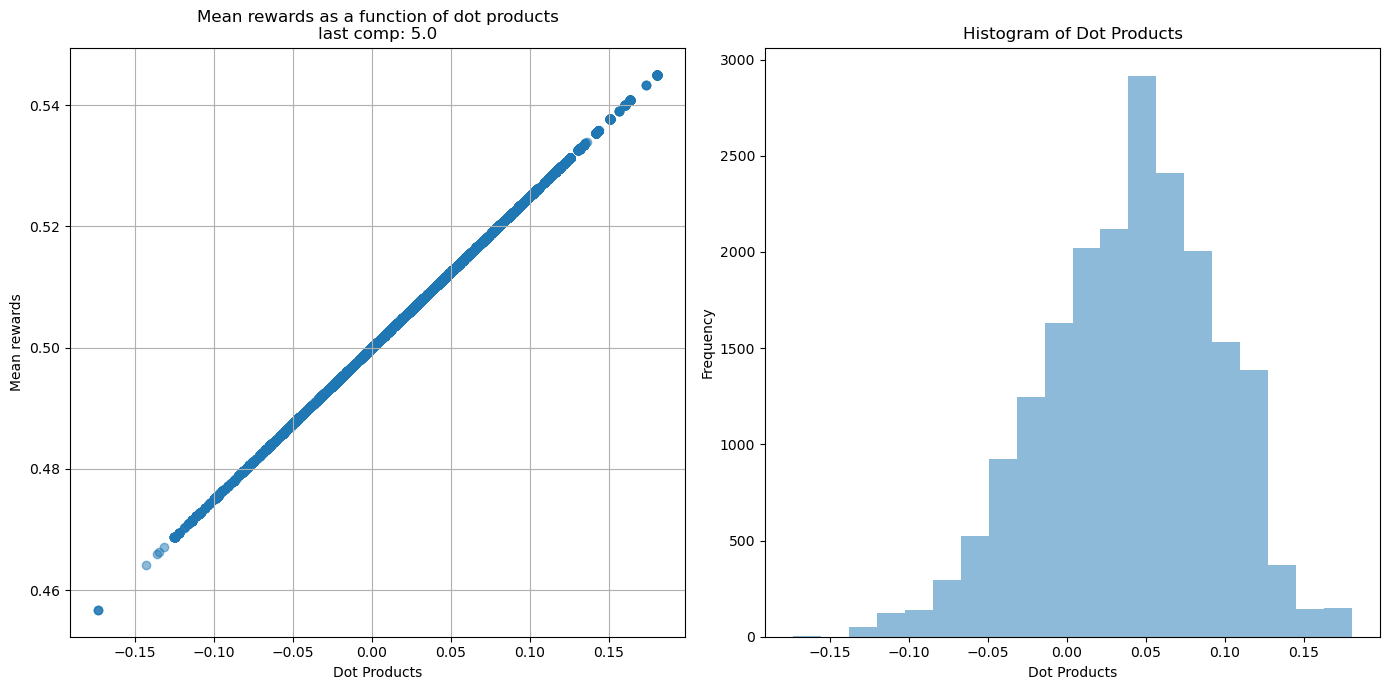

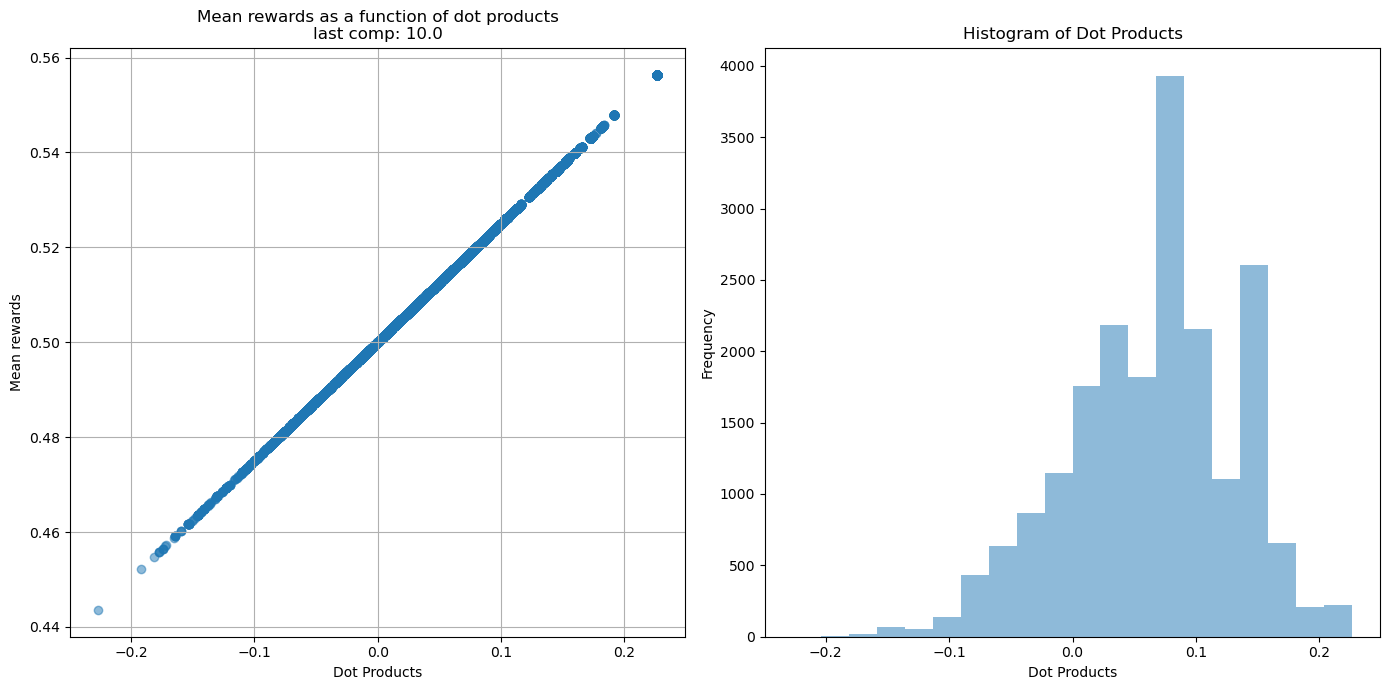

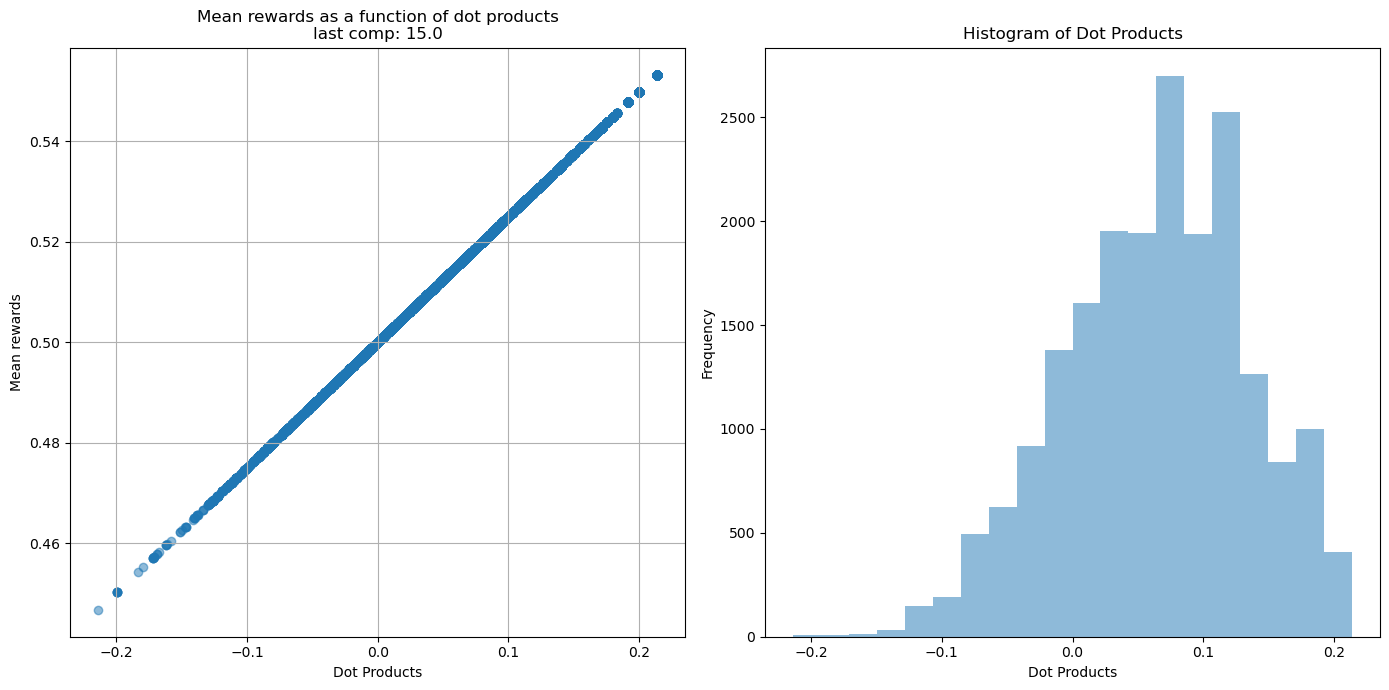

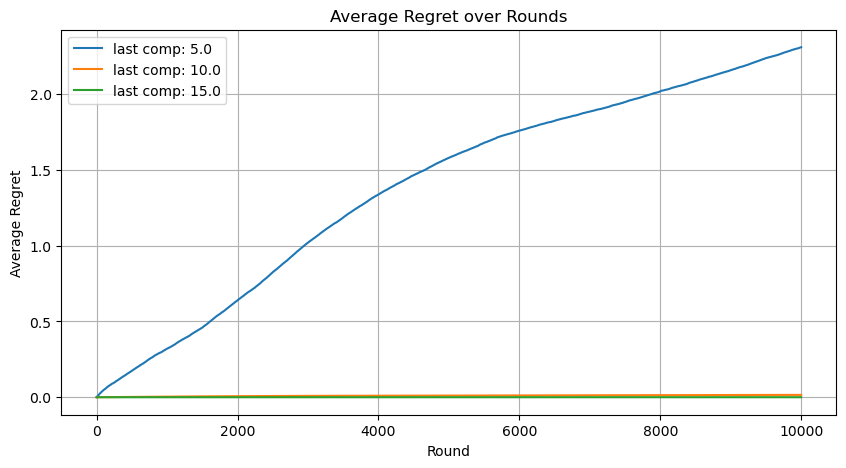

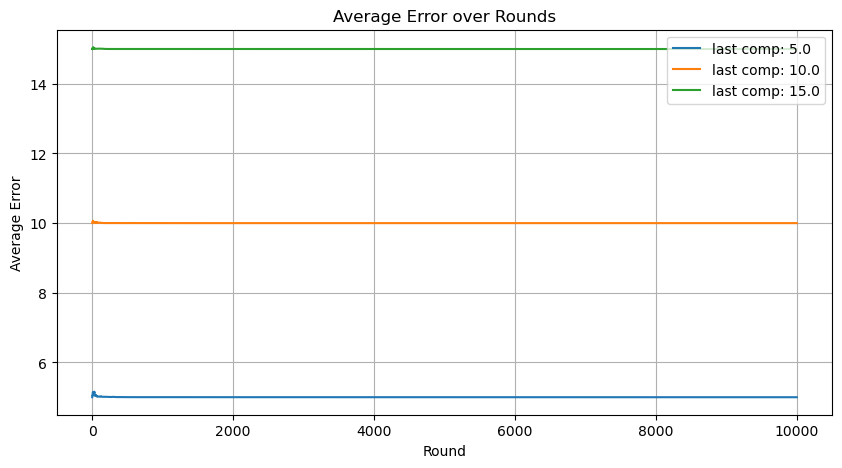

In [3]:
# Initialize the true_theta array that is true_theta with the last element set from [-20, -10, -5, 5, 10, 20]
d = 5
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [5, 10, 15]
true_theta_array = np.zeros((len(last_component_values), d))
for i in range(len(last_component_values)):
    true_theta = original_true_theta.copy() # Use copy to avoid modifying original_true_theta
    true_theta[-1] = last_component_values[i]
    true_theta_array[i] = true_theta

print(true_theta_array)
true_thetas = []
run_preference_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=2, alpha=1, type = 'preference', generate_context=True)

## Changing the norm of true_theta

In [13]:
# Initialize the true_theta array that is true_theta but scaled by a factor s
d = 5
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
scale_factors = [0.1, 1, 5, 10]
true_theta_array = np.zeros((len(scale_factors), d))
for i in range(len(scale_factors)):
    true_theta = original_true_theta.copy() # Use copy to avoid modifying original_true_theta
    true_theta *= scale_factors[i]
    true_theta_array[i] = true_theta

[[ 2.84646879e-03 -1.38382610e-02  4.82939604e-04 -1.28085874e-02
  -2.43930233e-03]
 [ 2.84646879e-02 -1.38382610e-01  4.82939604e-03 -1.28085874e-01
  -2.43930233e-02]
 [ 1.42323440e-01 -6.91913048e-01  2.41469802e-02 -6.40429370e-01
  -1.21965116e-01]
 [ 2.84646879e-01 -1.38382610e+00  4.82939604e-02 -1.28085874e+00
  -2.43930233e-01]]


Total progress:   0%|          | 0/8 [00:00<?, ?it/s]

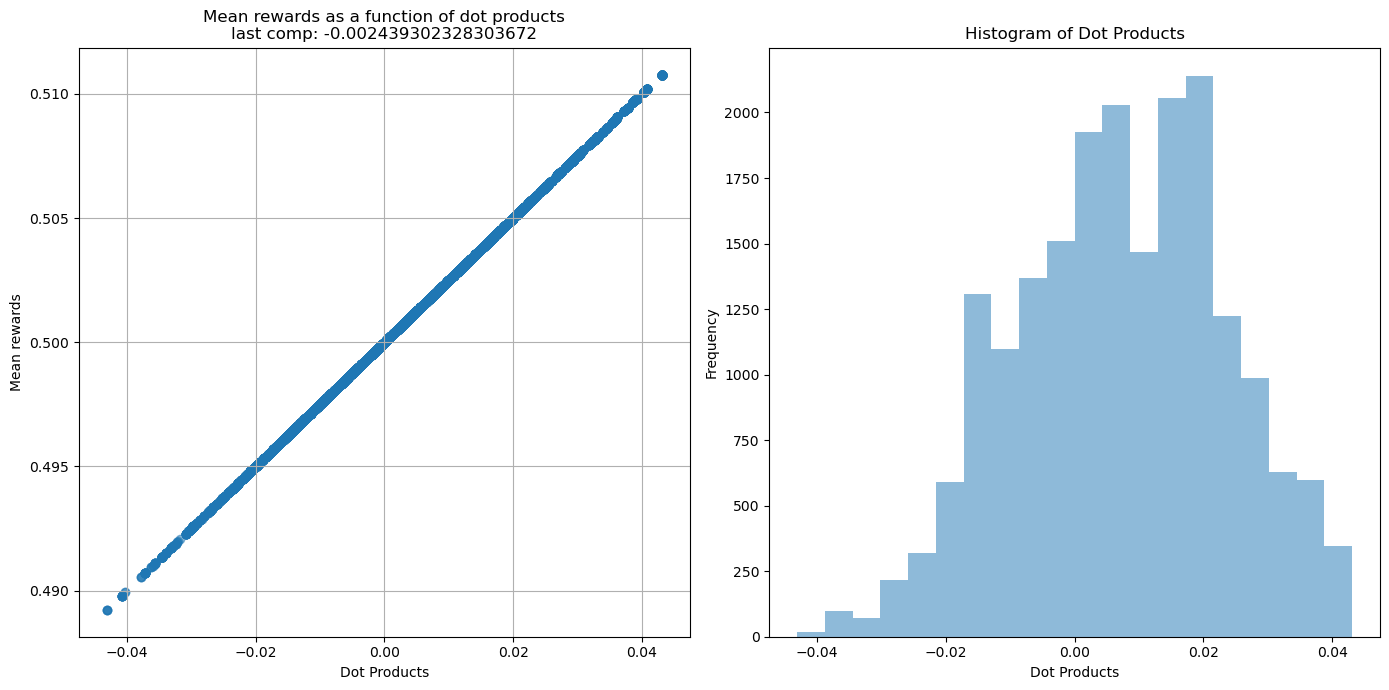

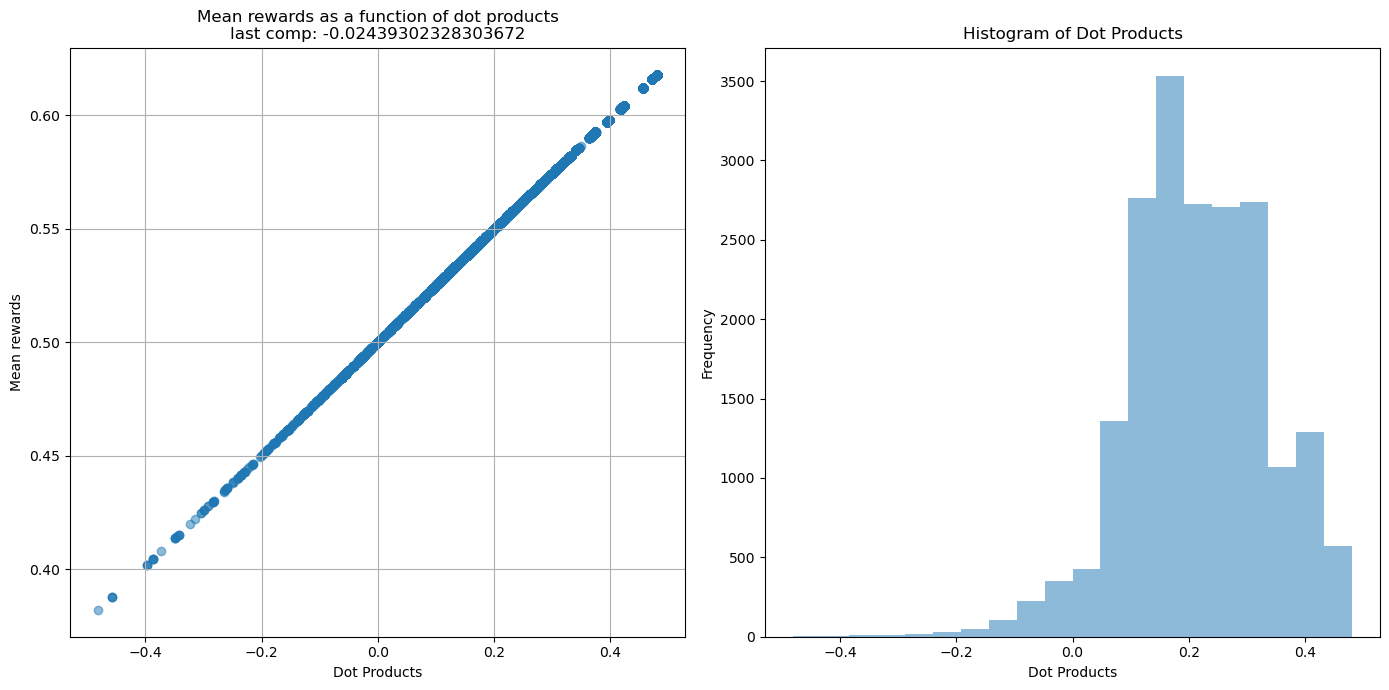

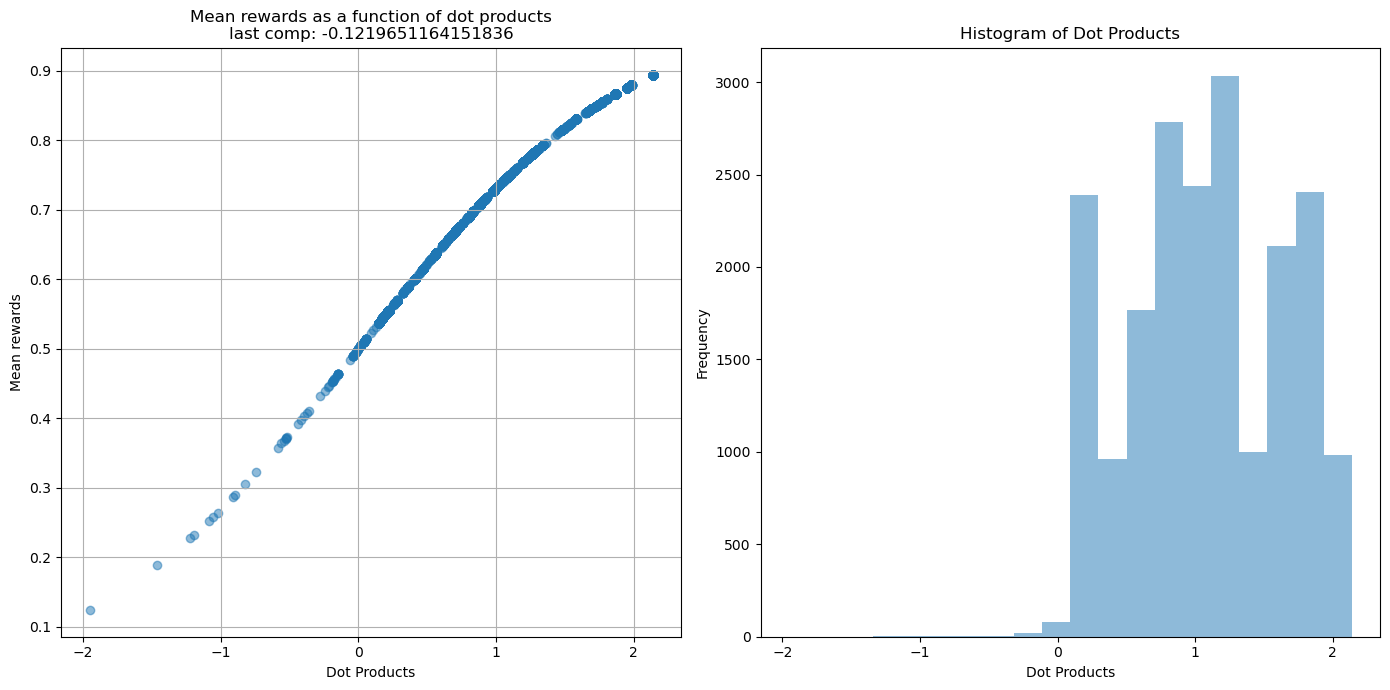

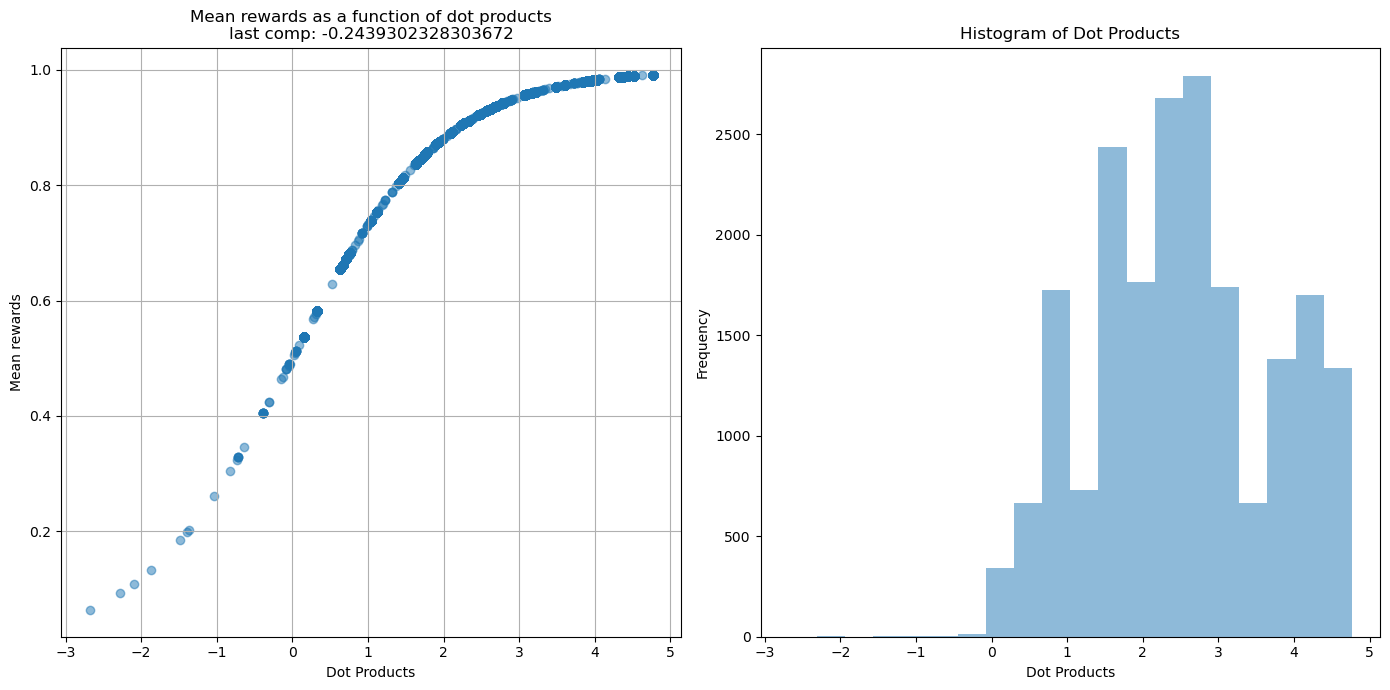

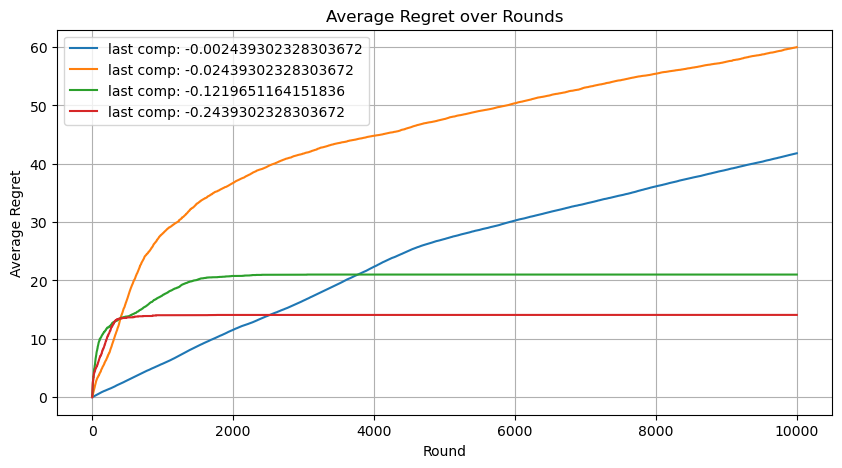

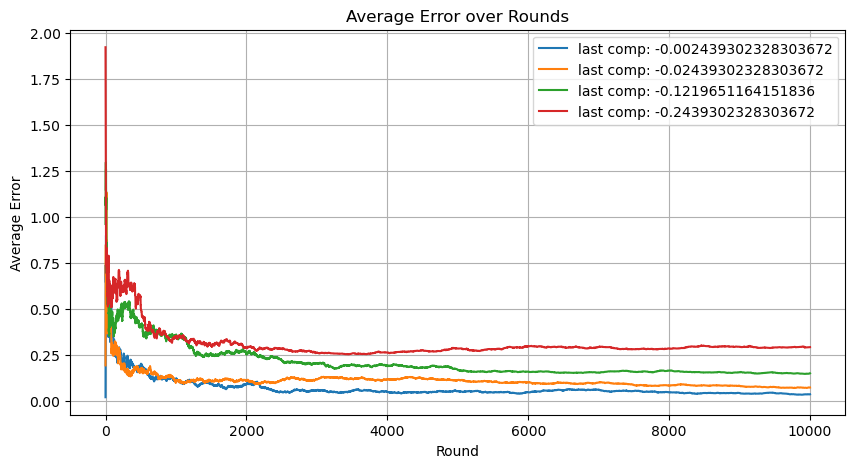

In [14]:
print(true_theta_array)
run_preference_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=2, alpha=1, type = 'preference', generate_context=True)

VARINGA

Total progress:   0%|          | 0/8 [00:00<?, ?it/s]

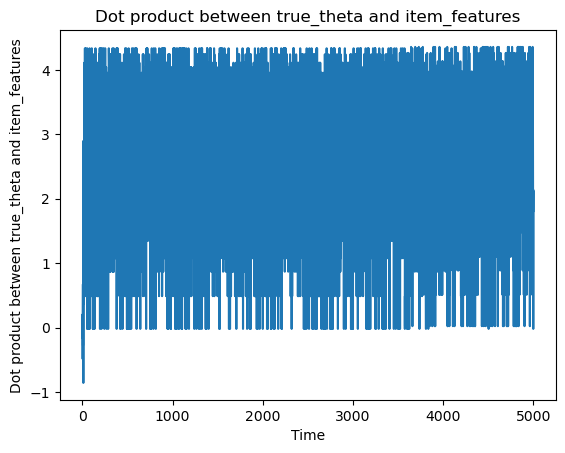

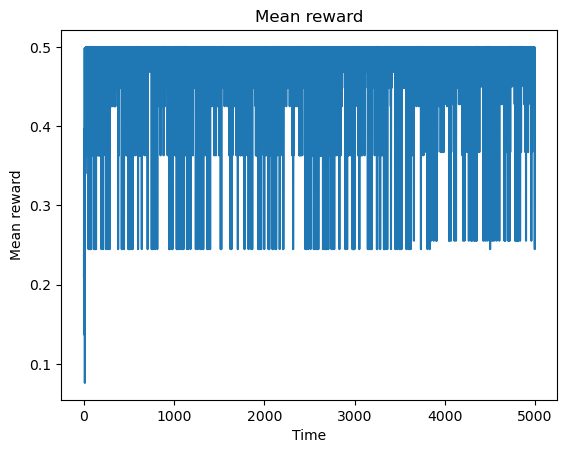

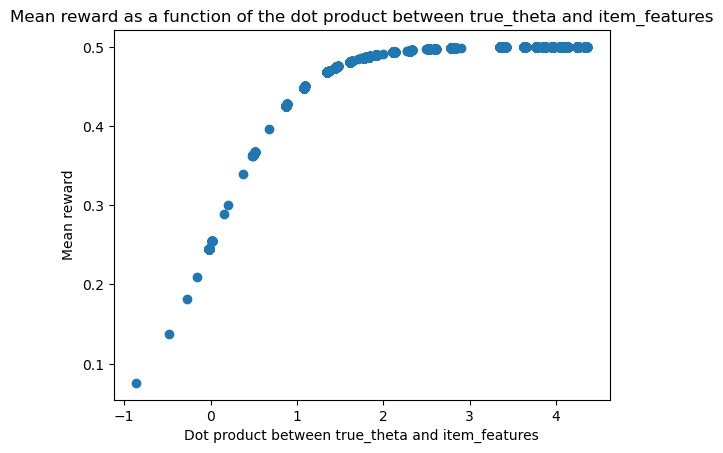

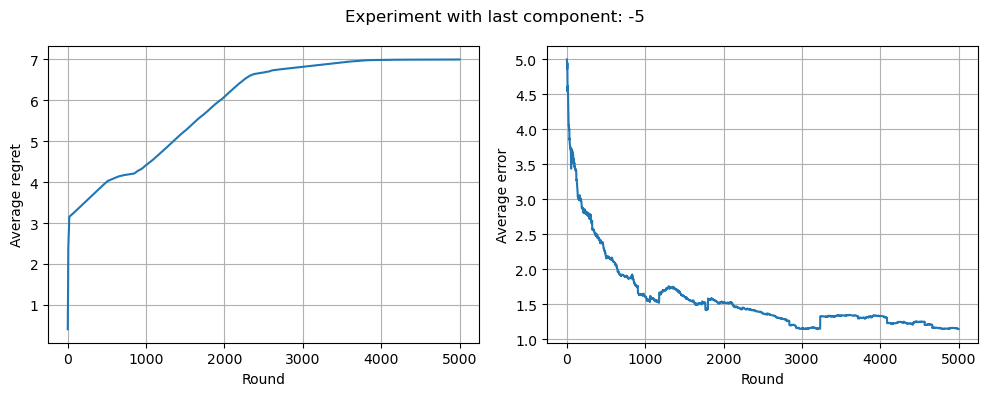

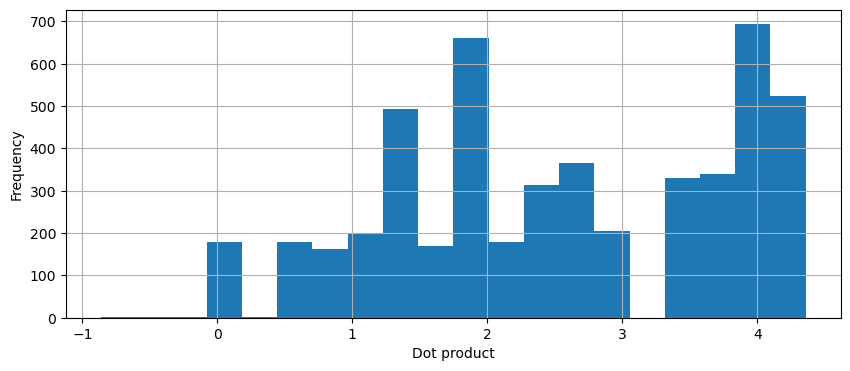

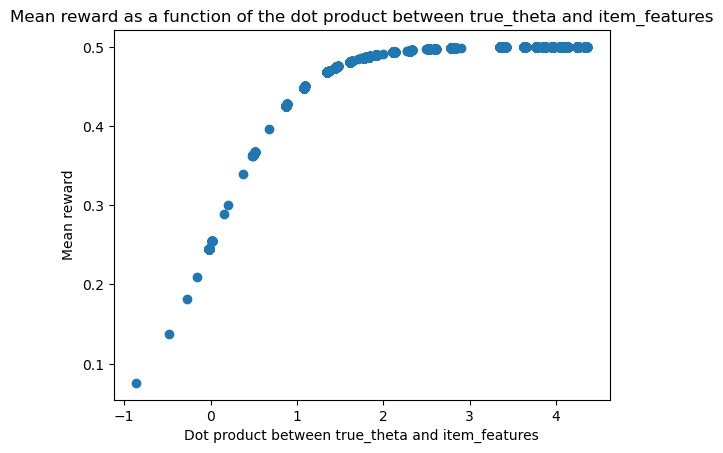

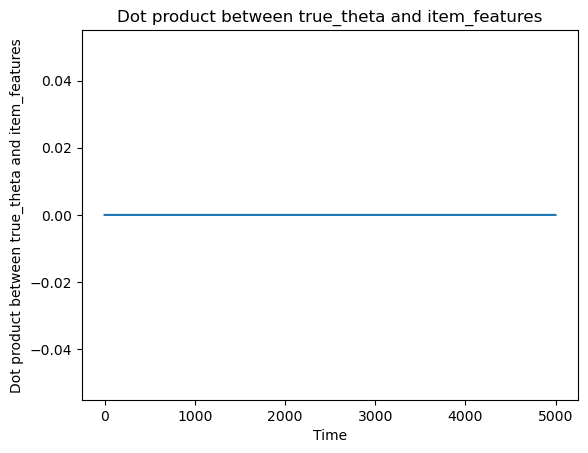

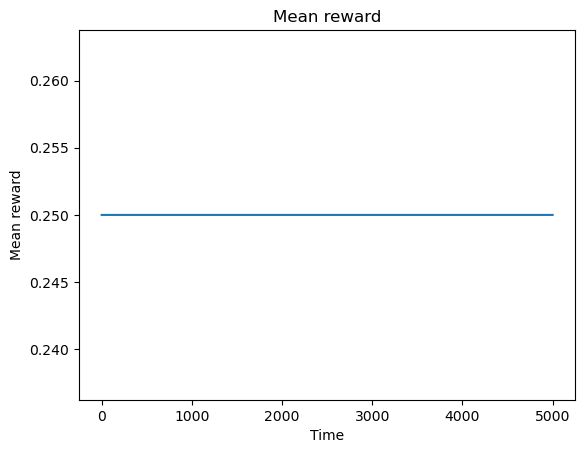

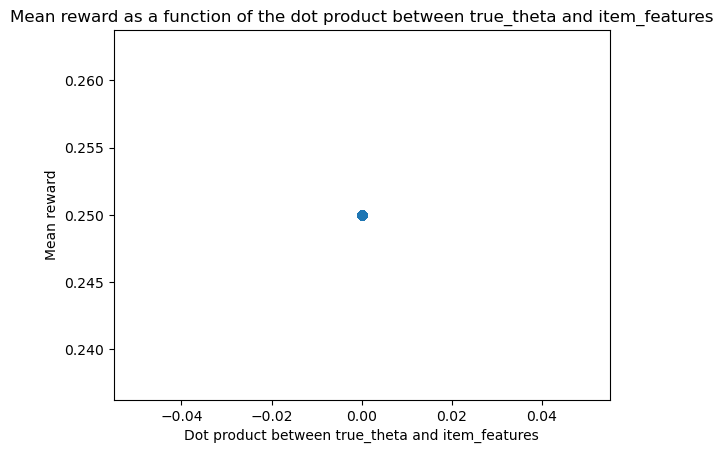

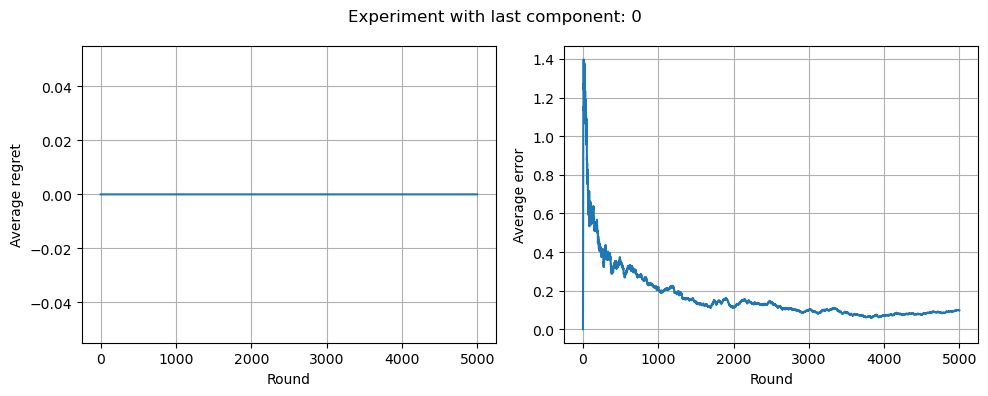

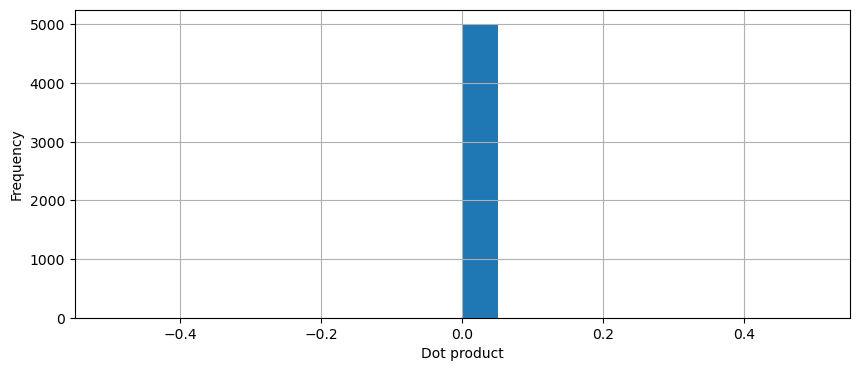

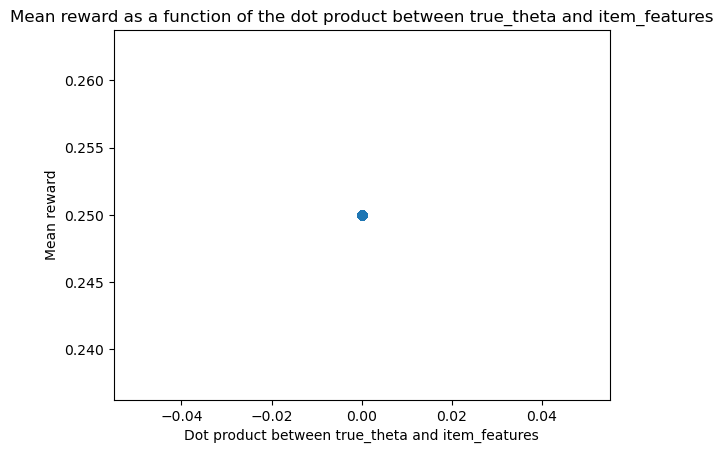

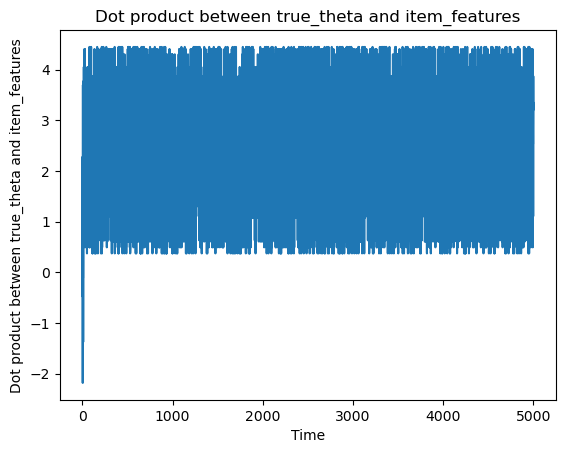

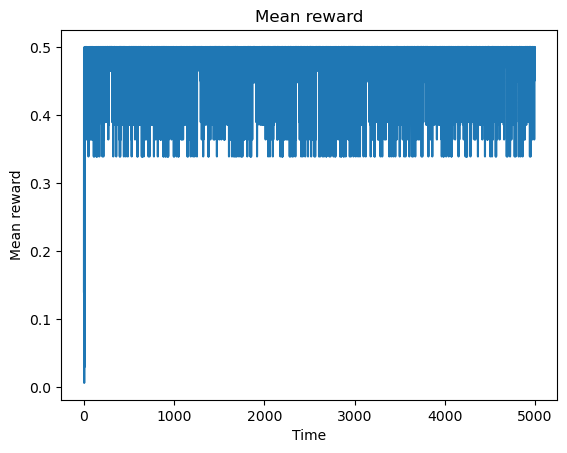

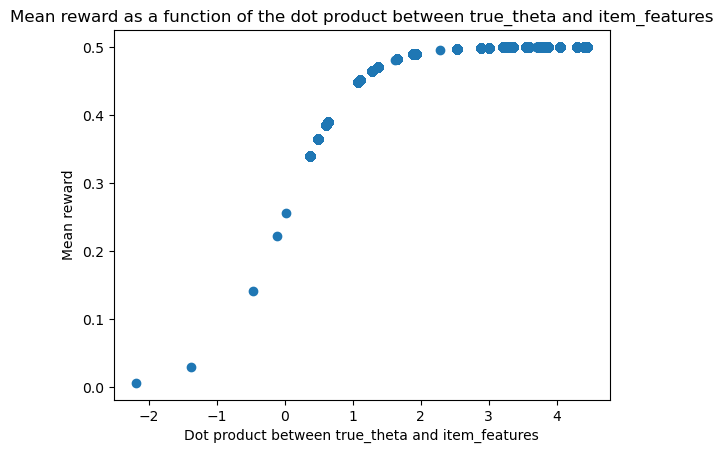

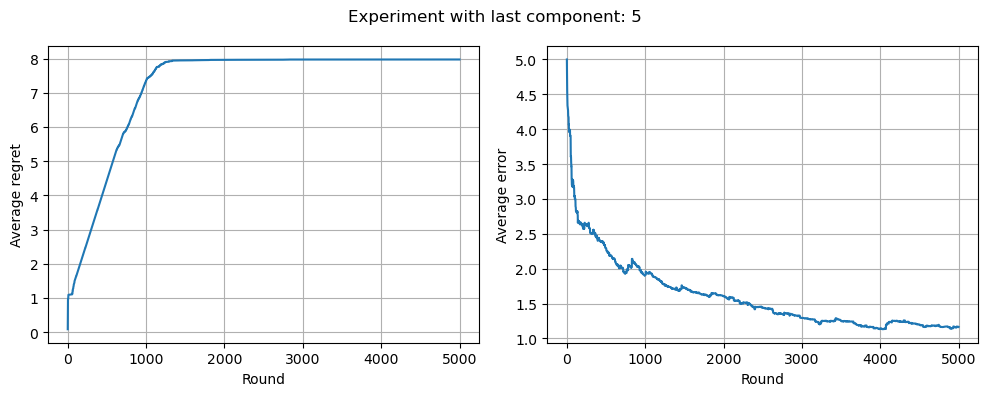

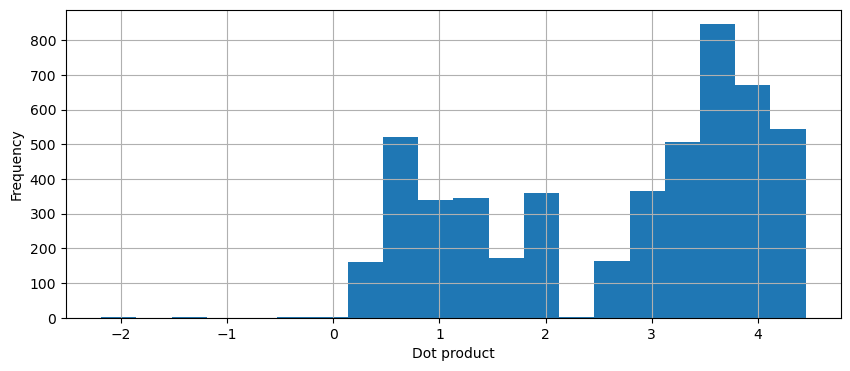

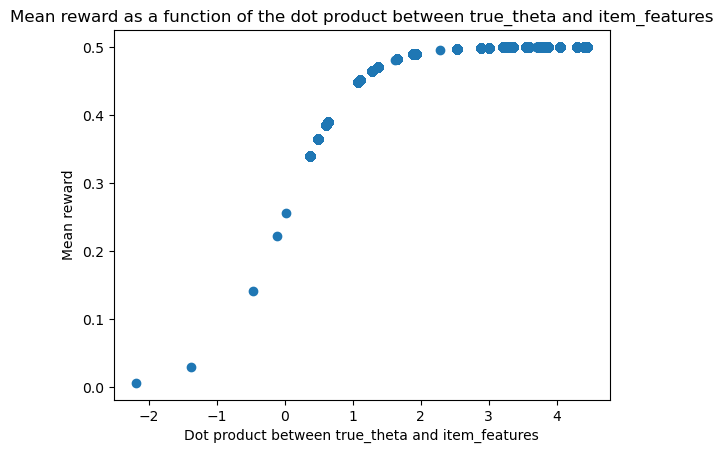

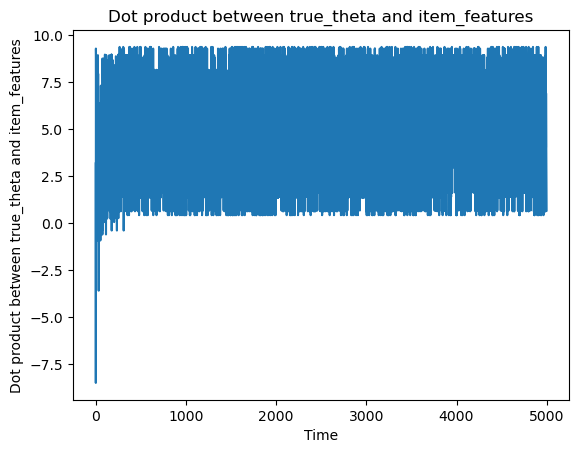

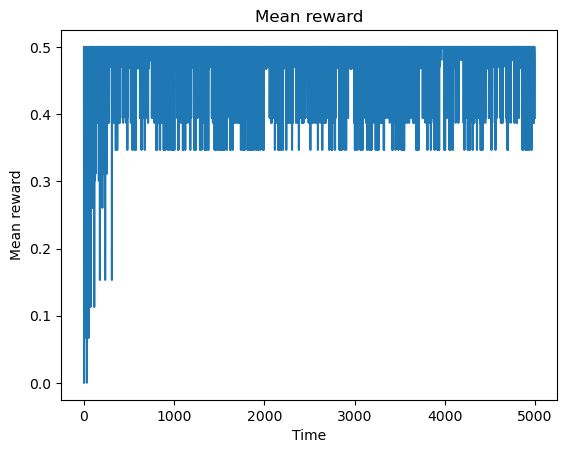

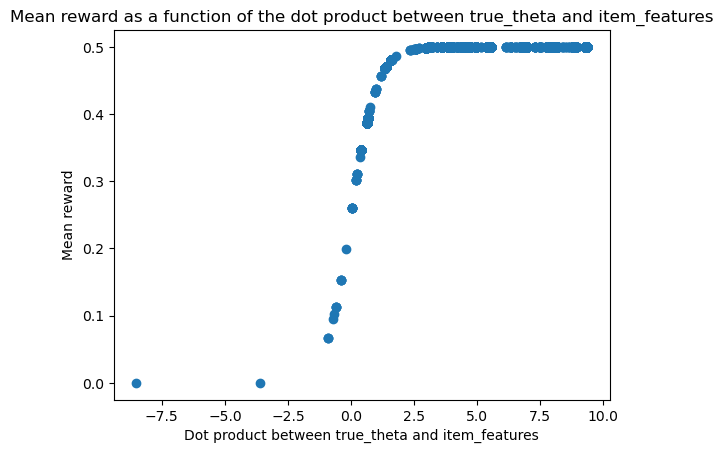

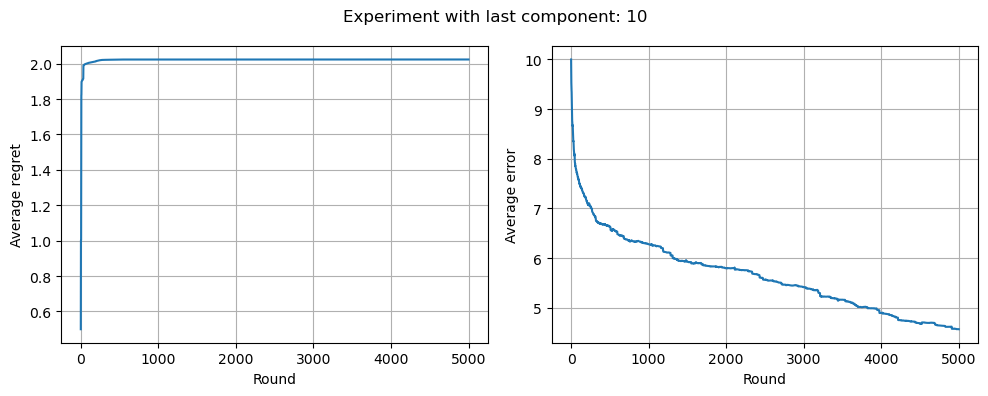

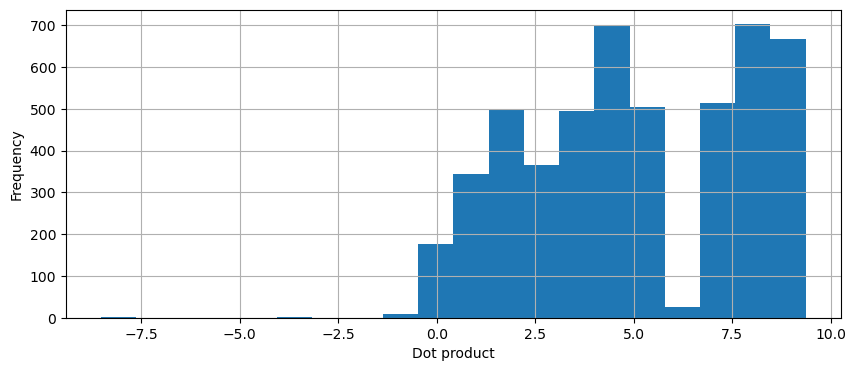

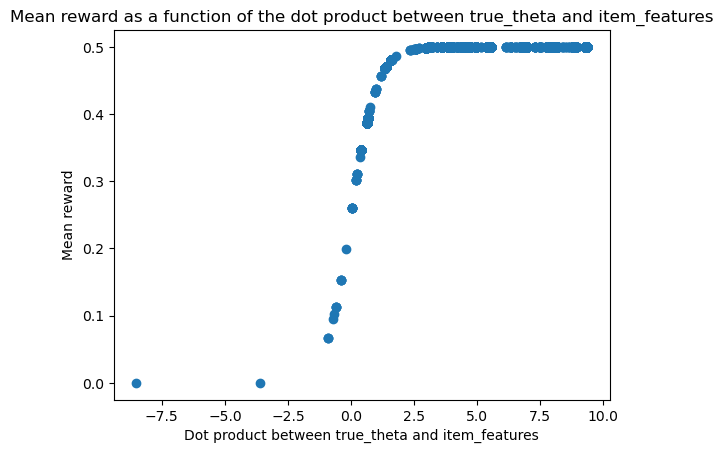

In [4]:
d = 10
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [-5, 0, 5, 10]
num_items = 30
true_theta_array = np.zeros((len(last_component_values), d))
num_rounds = 5000
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
#item_features[:,-1] = 1 # Set the last feature to 1 for all items
sigma_noise = 1.0

run_theta_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=2, alpha=0.1, type = 'preference', last_component_array=last_component_values)

Total progress:   0%|          | 0/80 [00:00<?, ?it/s]

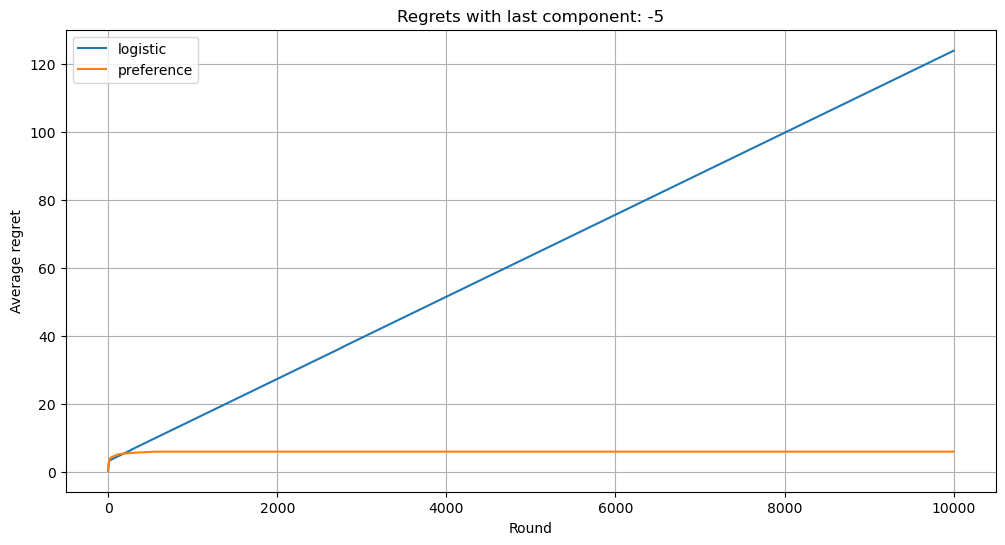

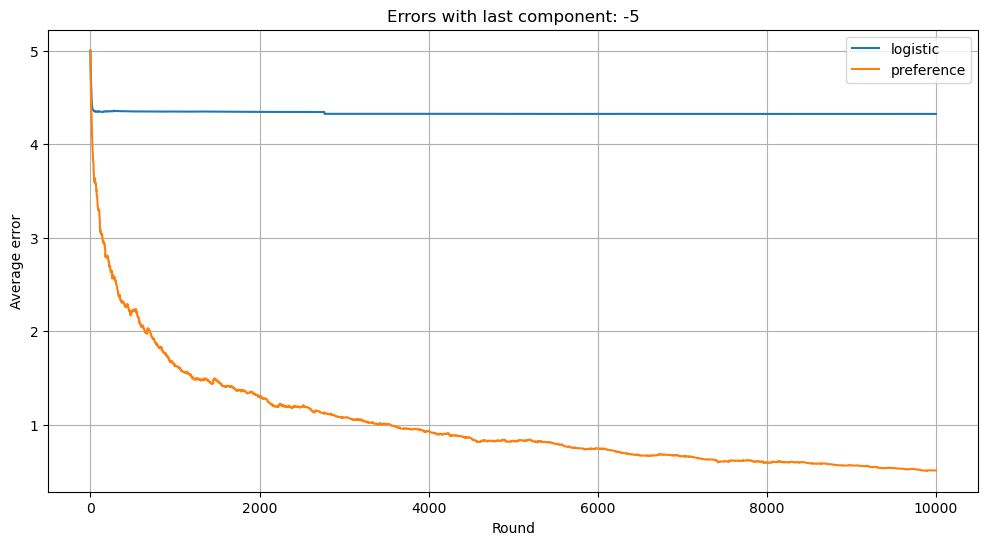

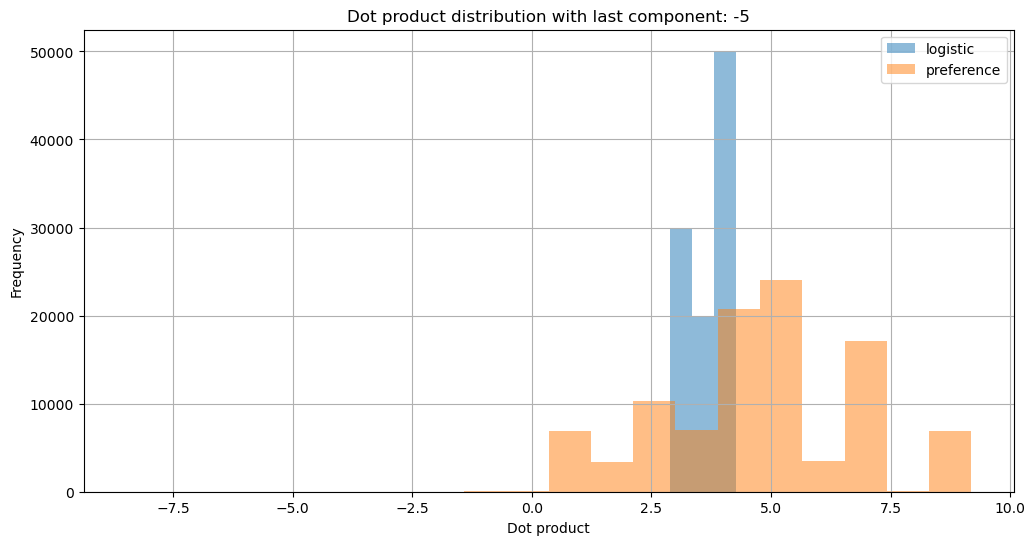

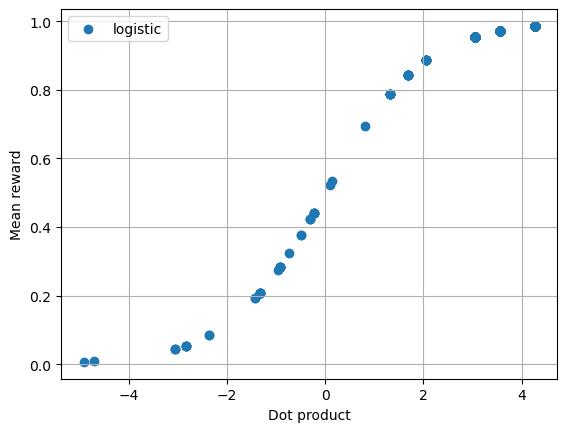

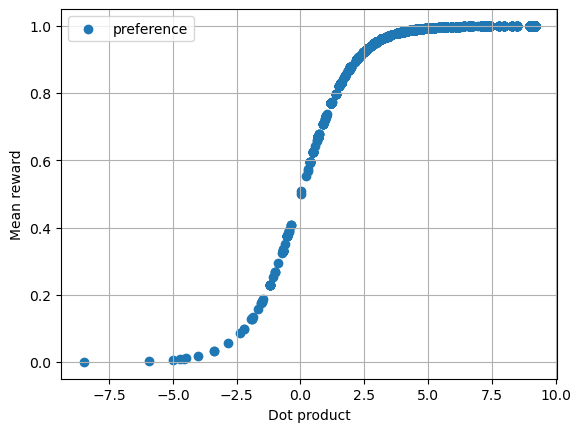

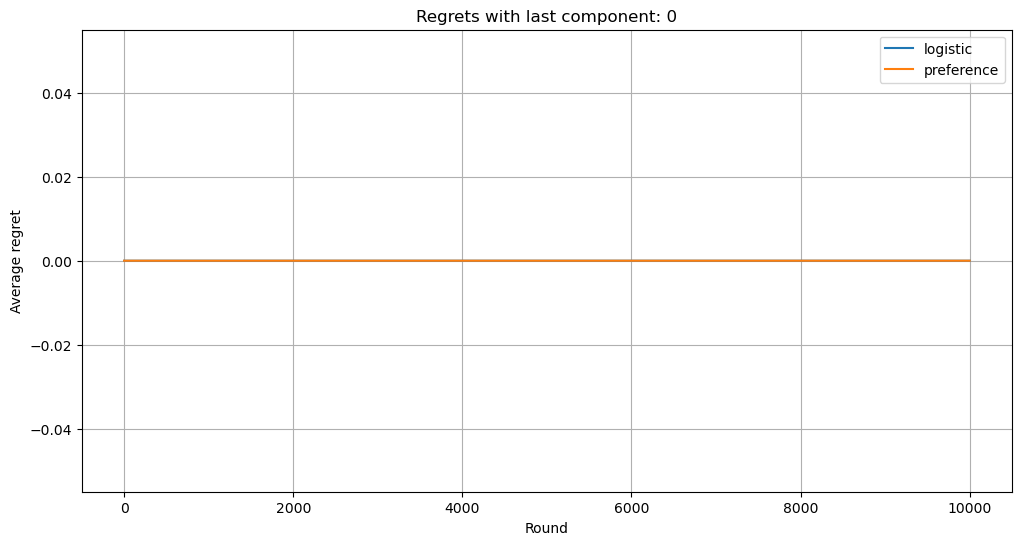

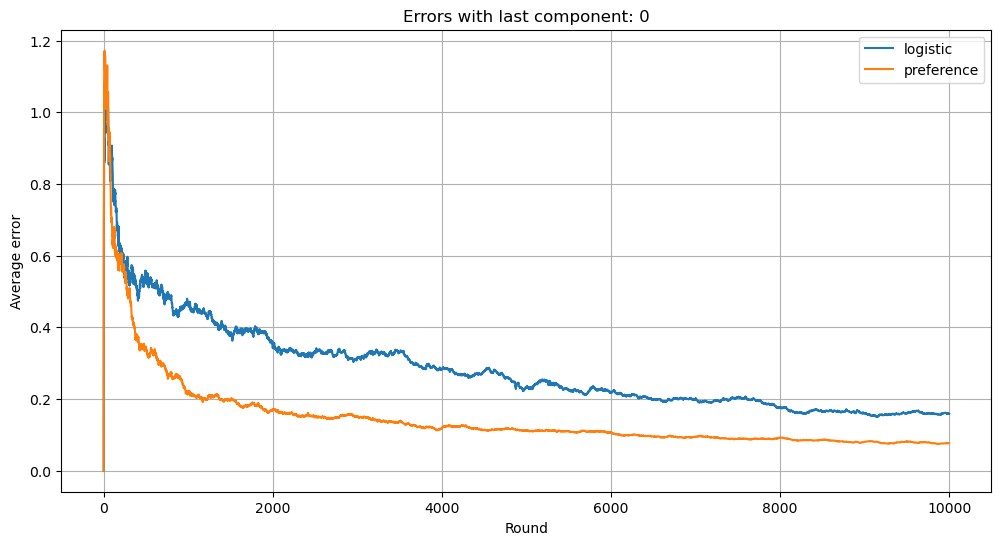

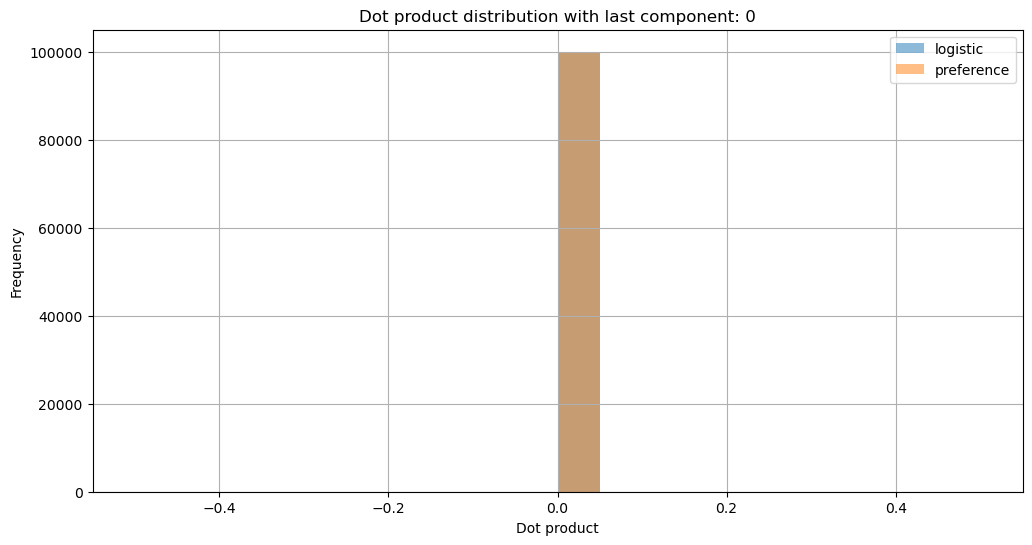

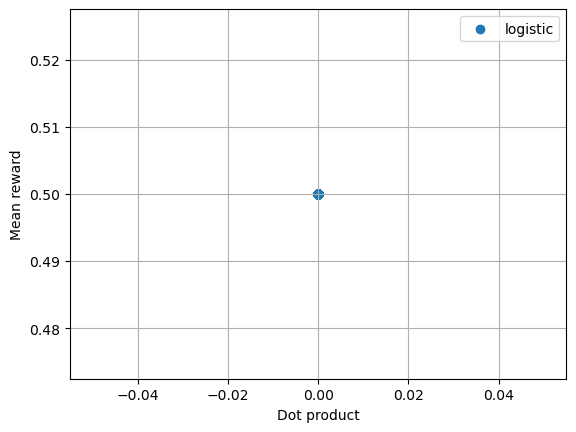

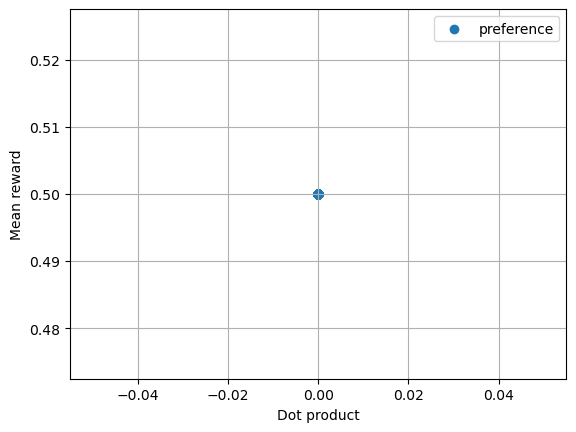

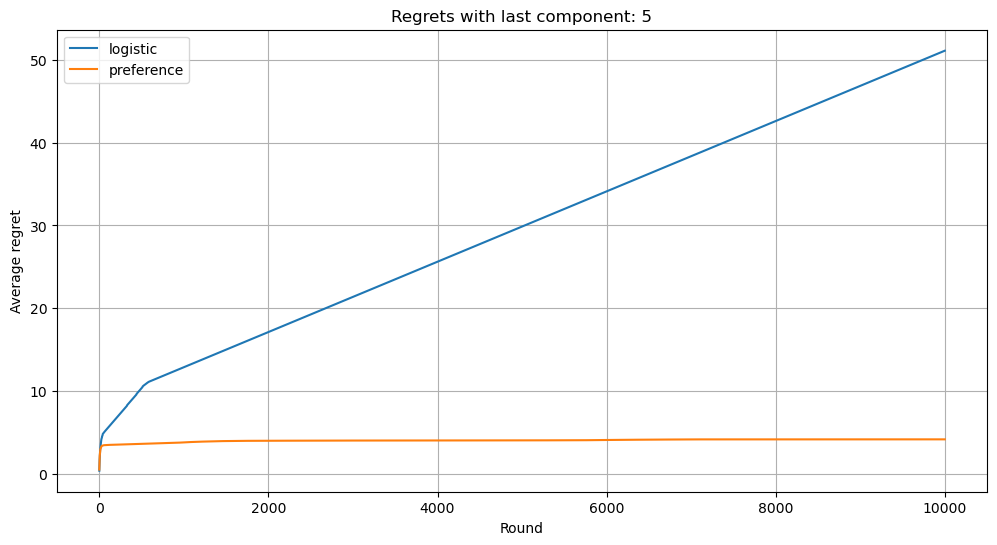

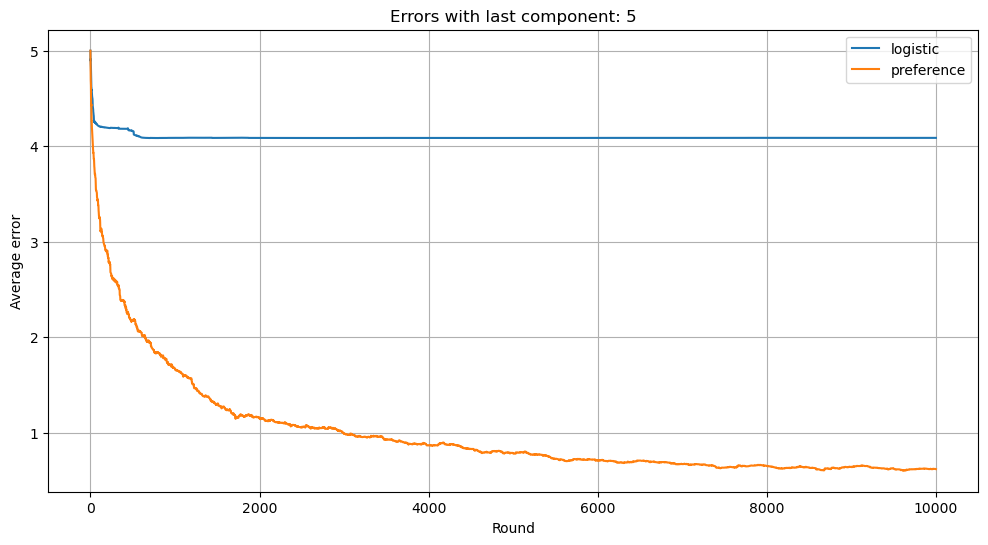

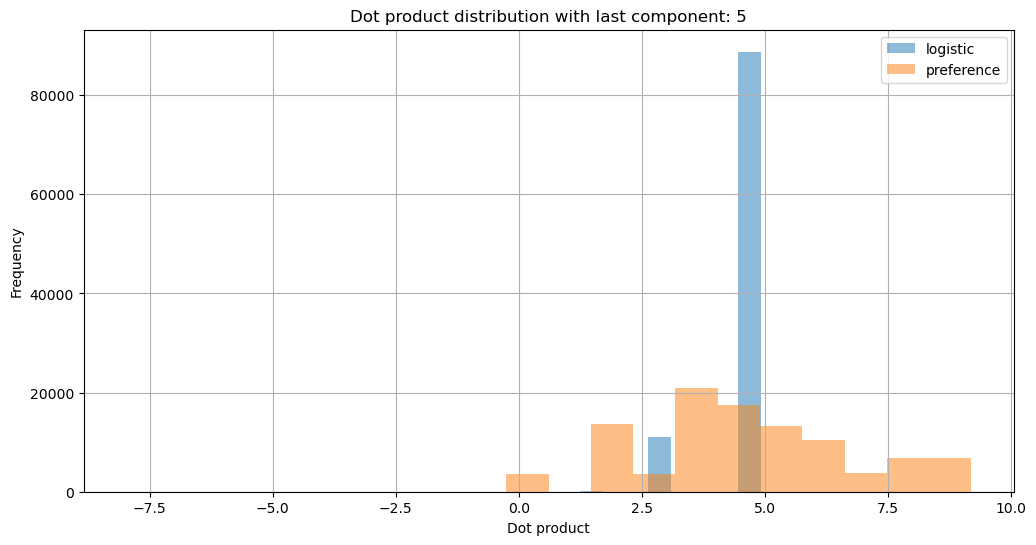

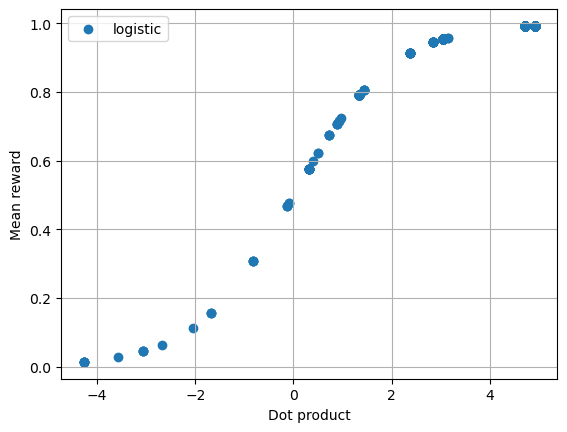

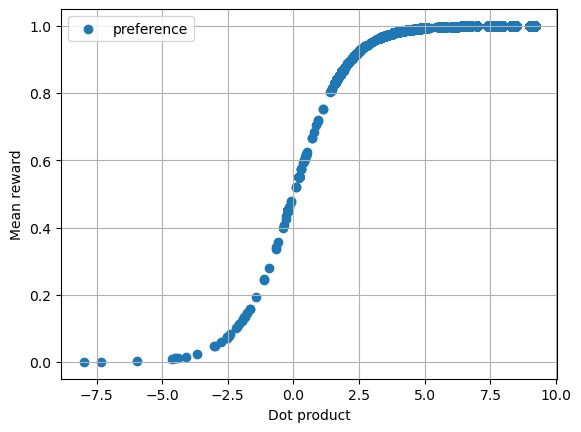

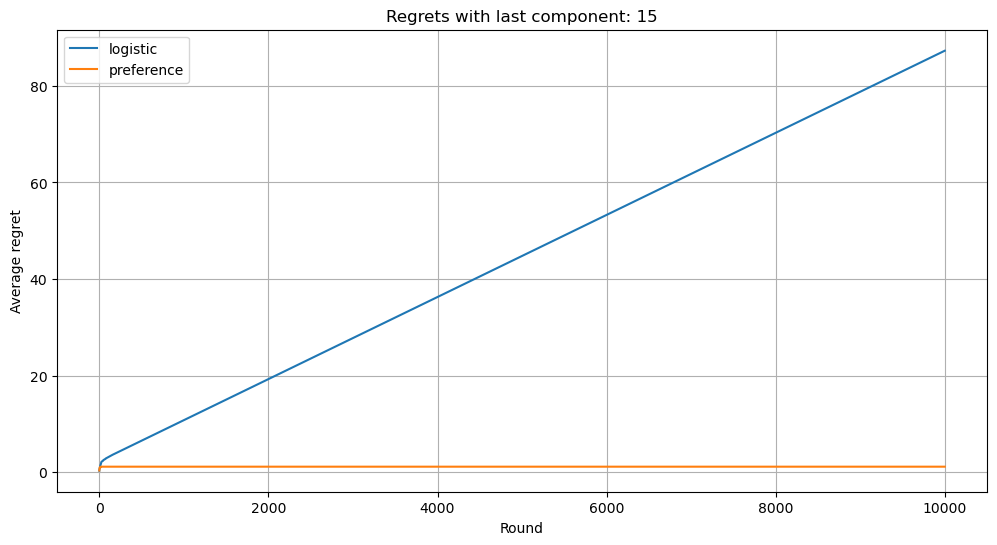

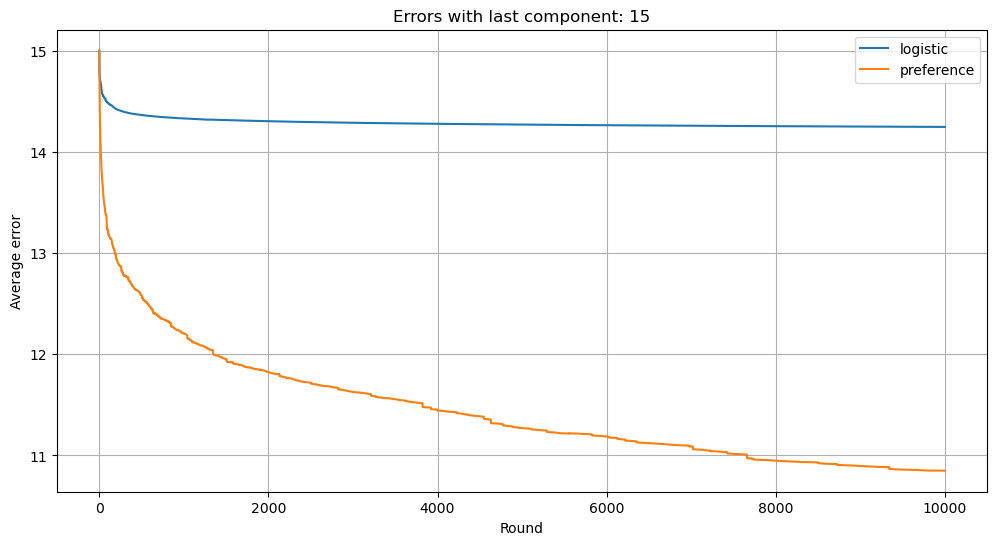

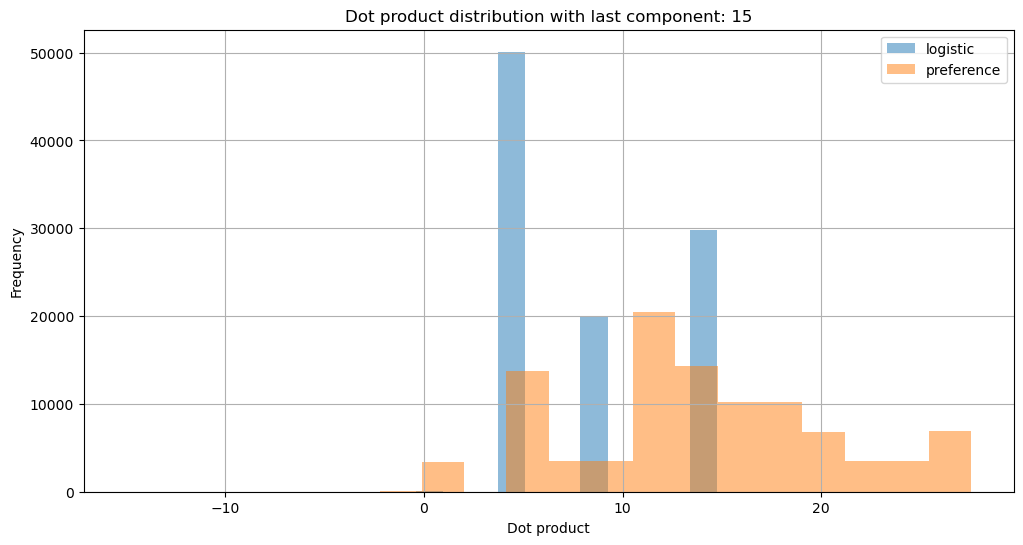

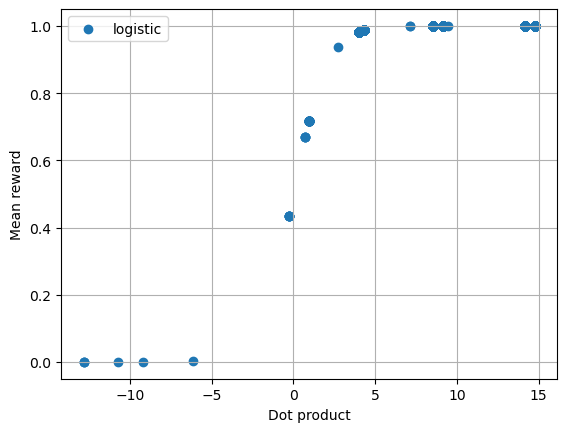

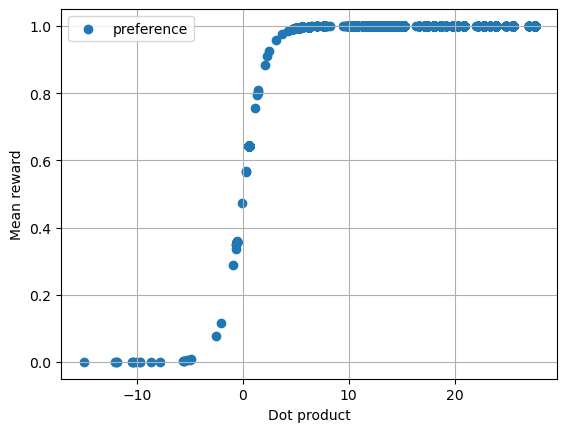

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
d = 10
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [-5, 0, 5, 15]
num_items = 30
true_theta_array = np.zeros((len(last_component_values), d))
num_rounds = 10000
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
#item_features[:,-1] = 1 # Set the last feature to 1 for all items
sigma_noise = 1.0

run_versus_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=10, alpha=0.1, last_component_array=last_component_values)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from main import *
d = 10
original_true_theta = np.random.uniform(low=-1, high=1, size=d)/d
last_component_values = [-5, 0, 5, 15]
num_items = 30
true_theta_array = np.zeros((len(last_component_values), d))
num_rounds = 10000
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
item_features[:,-1] = 1 # Set the last feature to 1 for all items
sigma_noise = 1.0

run_versus_experiment(d, item_features, true_theta_array, num_rounds, sigma_noise, nbr_runs=10, alpha=0.1, last_component_array=last_component_values)